In [1]:
library("devtools");
library("metacell")
library(tidyverse)
scdb_init("output/scrna_db/", force_reinit=T)

mat_id = "embs"
mc_id = "mc_rc"
mc = scdb_mc(mc_id)
mat = scdb_mat(mat_id)

md = mat@cell_metadata
# mc_t = table(mc@mc, mc@colors[mc@mc])

Loading required package: usethis

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

initializing scdb to output/scrna_db/



In [2]:
mc_cols = read.csv('metacell_types-2022-07-04_proj.csv' ,header = T)[,c('metacell', 'color')]
mc_cols[,'metacell'] = as.integer(mc_cols[,'metacell'])+1
# mc@colors = mc_cols$color
# names(mc@colors) = mc_cols$metacell
# scdb_add_mc("mc_noexec_rc", mc)

In [3]:
length(mc_cols$metacell)
length(mc@annots)
length(intersect(mc_cols$metacell,mc@annots))

[1] 3584

[1] 3584

[1] 3584

In [4]:
mc@colors = mc_cols$color
names(mc@colors) = mc_cols$metacell
# scdb_add_mc("mc_noexec_rc", mc)

In [ ]:
# scdb_add_mc("mc_rc", mc)

In [ ]:
# mc_col = mc@colors
# mc_col[is.na(mc_col)] = "grey"

In [ ]:
# mc@colors = mc_col
# scdb_add_mc("mc2_mc11_rc2", mc)

In [ ]:
# mc_exe = mc@mc[mc@colors %in% setdiff(mc@colors, c(
#     '#F397C0',  # hypoblast
#     '#CF6191',  # Hypoblast-Anterior (Hhex/Lhx1/Cer1)
#     '#572E48',  # Yolk sac
#     '#050505',  # Parietal Endoderm
#     '#D4EB63',  # Dusp6 not other
#     '#FFFF00',  # Gata2 Hand1
#     '#54DCE3',  # Wfdc2 Aldoc
#     '#00FF15',  # Dppa3 low Dusp6 neg
#     '#FFA600',  # Lgals3
#     '#FF00B7',  # DPPA3 TGM3
#     '#7B00FF',  # Dppa3 Hand1
#     'grey'
# ))]

In [ ]:
# mc_noexe_c = scdb_mc("mc_noexe_c")

In [ ]:
# length(mat@ignore_cells)
# mcell_mat_ignore_cells("embs_with_meta_filt_emb", "embs_with_meta_filt", to_ig)

In [ ]:
# mc_id_2 = "mc2_mc2_embs10_emb"
# scdb_add_mc(
#     mc_id_2, 
#     tgMCCov(
#         mc_emb, 
#         character(length = 0),
#         mat
#     )
# )

In [ ]:
# length(mc_emb)

In [ ]:
# md[is.na(md$embryo),]$embryo = 'empty'

In [5]:
md[md$embryo=='Rab5_e6_Anterior',]$embryo = "Rab5_e6"
md[md$embryo=='Rab5_e6_Posterior',]$embryo = "Rab5_e6"

md[md$embryo=='Rab8_e6_Anterior',]$embryo = "Rab8_e6"
md[md$embryo=='Rab8_e6_Posterior',]$embryo = "Rab8_e6"
md[md$embryo=='Rab8_e6_Trunk',]$embryo = "Rab8_e6"

md[md$embryo=='0824e4_anterior',]$embryo = "0824e4"
md[md$embryo=='0824e4_posterior',]$embryo = "0824e4"
md[md$embryo=='0824e4_middle',]$embryo = "0824e4"

md[md$embryo=='Rab15_e1_head',]$embryo = "Rab15_e1"
md[md$embryo=='Rab15_e1_midAnt',]$embryo = "Rab15_e1"
md[md$embryo=='Rab15_e1_midPost',]$embryo = "Rab15_e1"
md[md$embryo=='Rab15_e1_tail',]$embryo = "Rab15_e1"

In [6]:
library(data.table)
# fwrite(md, "metadata.csv")


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




In [7]:
md$cell = rownames(md)

In [8]:
mc_t = table(md[names(mc@mc),"embryo"], mc@colors[mc@mc])
dim(mc_t)

[1] 120  52

In [9]:
excluded_embryos = c('Rab6_e7',
'Rab6_e6',
'Rab6_e1',
'0824e6',
'Rab5_e3',
'Rab12_e3')

In [10]:
too_small_embryos = c("Rab3_f1e10", "Rab3_f1e12", "Rab3_f1e3", "Rab3_f1e8", "Rab5_e5", 
"rab13_e2")

In [12]:
excluded_embryos = c(excluded_embryos, too_small_embryos)

In [13]:
# exclude hypoblast (#F397C0), trophoblast (#666666), yolk sac (#572E48)
# mc_t = mc_t[setdiff(rownames(mc_t), c('Rab5_e1', 'rab2_f1e3')), ]
mc_t = mc_t[rownames(mc_t), 
            setdiff(colnames(mc_t), c(
    '#F6BFCB',  # hypoblast
    '#CF6191',  # Hypoblast-Anterior (Hhex/Lhx1/Cer1)
    '#572E48',  # Yolk sac
    '#050505',  # Parietal Endoderm
    '#D4EB63',  # Dusp6 not other
    '#FFFF00',  # Gata2 Hand1
    '#54DCE3',  # Wfdc2 Aldoc
    '#00FF15',  # Dppa3 low Dusp6 neg
    '#FFA600',  # Lgals3
    '#FF00B7',  # DPPA3 TGM3
    '#7B00FF',  # Dppa3 Hand1
    'grey'
))
           ]
dim(mc_t)

[1] 120  41

In [14]:
rowSums(mc_t[excluded_embryos,])

Rab6_e7    Rab6_e6    Rab6_e1     0824e6    Rab5_e3   Rab12_e3 Rab3_f1e10 
        97        233        194        633        820       1159          4 
Rab3_f1e12  Rab3_f1e3  Rab3_f1e8    Rab5_e5   rab13_e2 
        17         10         12          0          0

In [15]:
# rownames(mc_t[rowSums(mc_t) <= 30,])
dput(rownames(mc_t[rowSums(mc_t) <= 20,]))
# rownames(mc_t[rowSums(mc_t) <= 10,])

c("Rab3_f1e10", "Rab3_f1e12", "Rab3_f1e3", "Rab3_f1e8", "Rab5_e5", 
"rab13_e2")


In [20]:
length(excluded_embryos)

[1] 12

In [16]:
mc_t = mc_t[rowSums(mc_t) > 20,]

In [17]:
mc_t = mc_t[setdiff(rownames(mc_t), c('empty')),]

In [18]:
dim(mc_t)

[1] 114  41

In [15]:
emb_cells = rowSums(mc_t)[mega_order]

ERROR: Error in eval(expr, envir, enclos): object 'mega_order' not found


In [35]:
names(emb_cells) = 1:108

In [37]:
# options(repr.plot.width=25, repr.plot.height=12)
pdf("emb_cells.pdf", width=12, height=4)
barplot(emb_cells)
dev.off()

png 
  2

In [24]:
mc_t = mc_t#[setdiff(rownames(mc_t), c('8.24e+08')),]
# mc_t = mc_t[excluded_embryos,]
mc_tn = (mc_t/rowSums(mc_t))

In [32]:
color_ord = c( 
'#FACB12', #PGC
'#E2F700', #Median TFAP
'#f7f79e', #Surface ectoderm
'#CDE087', #Floor plate
'#C3C388', #Neural crest
'#879E86', #Neural plate boundary
# '#CDE089', #Neural tube Posterior
'#CDE088', #Neural tube Anterior
'#647A4F', #Forebrain/Midbrain/Hindbrain
'#354E23', #Caudal neurectoderm
'#649146', #rostral neurectoderm
'#90BF75', #Ectoderm - Definitive
'#635547', #epiblast
'#DABE99', #Primitive streak
'#9e6762', #caudal epiblast
'#C594BF', #nascent mesoderm
'#B6A8ED', #Nascent mesoderm - extraembryonic
'#1a3f52', #caudal mesoderm
'#45d1c5', #Lateral & intermediate mesoderm
'#408DA1', #Paraxial Mesoderm
'#A8DBF7', #Presomitic mesoderm
'#1AA2EB', #Somitic mesoderm
'#8DB5CE', #rostral mesoderm
'#53f1fc', #Cardiopharyngeal mesoderm
'#B51D8D', #Caridac
'#8870ad', #ExE mesoderm
'#cc7818', #Amnion
'#532C8A', #Allantois
'#A69369', #chorionic mesothelium
'#966F1B', #Endothelial2
'#ff891c', #Endothelial
'#FBBE92', #Hematoendothelial
'#c9a997', #Blood progenitors
'#C72228', #Erythroid1
'#FF5608', #Erythroid2
'#c19f70', #Anterior primitive streak
'#6666ED', #Node
'#0F4A9C', #notochord
'#F397C0', #definitive endoderm
'#EF5A9E', #Gut
'#EF5A9D', #Foregut
'#F25CD4' #Hindgut
)

In [33]:
setdiff(colnames(mc_tn), color_ord)

character(0)

In [34]:
setdiff(color_ord, colnames(mc_tn))

character(0)

In [ ]:
# filtered bubble 220411
# transcriptional_rank = c("rab13_e3", "rab13_e9", "rab13_e8", "rab13_e11", "rab13_e5", "rab13_e10", "rab13_e1", "Rab3_f1e9", "Rab3_e6", "Rab3_e7", "Rab3_e5", "Rab3_f1e11", "Rab3_f1e13", "Rab3_f1e2", "Rab1_f1e4", "Rab7_e7", "Rab7_e6", "Rab1_f1e2", "Rab7_e2", "Rab7_e3", "Rab1_f1e7", "Rab7_e4", "Rab1_f1e6", "Rab1_f1e5", "Rab1_f1e3", "Rab1_f1e1", "Rab6_e5", "Rab6_e2", "Rab6_e8", "Rab6_e11", "Rab1_f2e2", "Rab6_e3", "Rab6_e10", "Rab6_e9", "Rab1_f2e4", "Rab9_e3", "Rab9_e6", "Rab9_e5", "Rab5_e1", "Rab1_f2e5", "Rab1_f2e7", "Rab1_f2e3", "Rab1_f2e6", "Rab1_f2e8", "Rab1_f2e9", "0830e1", "0830e10", "Rab9_e1", "Rab9_e2", "0830e2", "Rab5_e7", "0824e5", "0830e6", "0830e9", "0830e4", "0830e11", "0830e8", "0830e5", "0830e7", "0830e3", "Rab9_e4", "0824e1", "Rab5_e6", "Rab5_e2", "0824e2", "rab2_f2e2", "Rab5_e4", "rab2_f2e1", "0824e4", "Rab8_e5", "0824e3", "Rab8_e4", "rab2_f2e3", "rab2_f2e4", "Rab8_e1", "rab2_f1e6", "rab2_f1e1", "rab2_f1e2", "rab2_f1e4", "rab2_f2e5", "Rab8_e2", "Rab8_e6", "rab2_f1e8", "rab2_f1e3", "rab2_f1e9", "Rab8_e3", "rab2_f1e5", "Rab12_e2", "Rab12_e8", "Rab15_e9", "Rab15_e8", "Rab15_e7", "Rab15_e6", "Rab15_e1", "Rab12_e5", "rab14_e8", "rab14_e7", "rab14_e5", "rab14_e10", "rab14_e9", "rab14_e3", "rab14_e4", "rab14_e1", "rab14_e2", "rab14_e6", "Rab12_e1", "Rab12_e6", "Rab12_e4")

In [19]:
# filtered bubble 220411 rebubbled
transcriptional_rank = c("rab13_e3", "rab13_e9", "rab13_e8", "rab13_e11", "rab13_e5", "rab13_e10", "rab13_e1", "Rab3_f1e9", "Rab3_e6", "Rab3_e7", "Rab3_e5", "Rab3_f1e11", "Rab3_f1e13", "Rab3_f1e2", "Rab1_f1e4", "Rab7_e7", "Rab7_e6", "Rab1_f1e2", "Rab7_e2", "Rab7_e3", "Rab1_f1e7", "Rab7_e4", "Rab1_f1e6", "Rab1_f1e5", "Rab1_f1e3", "Rab1_f1e1", "Rab6_e2", "Rab6_e5", "Rab6_e8", "Rab6_e11", "Rab1_f2e2", "Rab6_e10", "Rab6_e3", "Rab6_e9", "Rab1_f2e4", "Rab9_e5", "Rab9_e3", "Rab9_e6", "Rab5_e1", "Rab1_f2e5", "Rab1_f2e3", "Rab1_f2e7", "Rab1_f2e6", "Rab1_f2e8", "Rab1_f2e9", "0830e1", "0830e10", "Rab5_e7", "Rab9_e1", "Rab9_e2", "0830e2", "0824e5", "0830e6", "0830e9", "0830e4", "0830e11", "0830e8", "0830e5", "0830e7", "0830e3", "Rab9_e4", "Rab5_e6", "0824e1", "Rab5_e2", "0824e2", "rab2_f2e2", "Rab5_e4", "0824e4", "rab2_f2e1", "Rab8_e5", "0824e3", "Rab8_e4", "rab2_f2e3", "rab2_f2e4", "Rab8_e1", "rab2_f1e6", "rab2_f1e1", "rab2_f1e2", "rab2_f1e4", "rab2_f2e5", "Rab8_e2", "Rab8_e6", "rab2_f1e8", "rab2_f1e3", "rab2_f1e9", "Rab8_e3", "rab2_f1e5", "Rab12_e2", "Rab12_e8", "Rab15_e9", "Rab15_e8", "Rab15_e7", "Rab15_e6", "Rab15_e1", "Rab12_e5", "rab14_e8", "rab14_e7", "rab14_e5", "rab14_e10", "rab14_e9", "rab14_e3", "rab14_e4", "rab14_e2", "rab14_e1", "rab14_e6", "Rab12_e1", "Rab12_e4", "Rab12_e6")

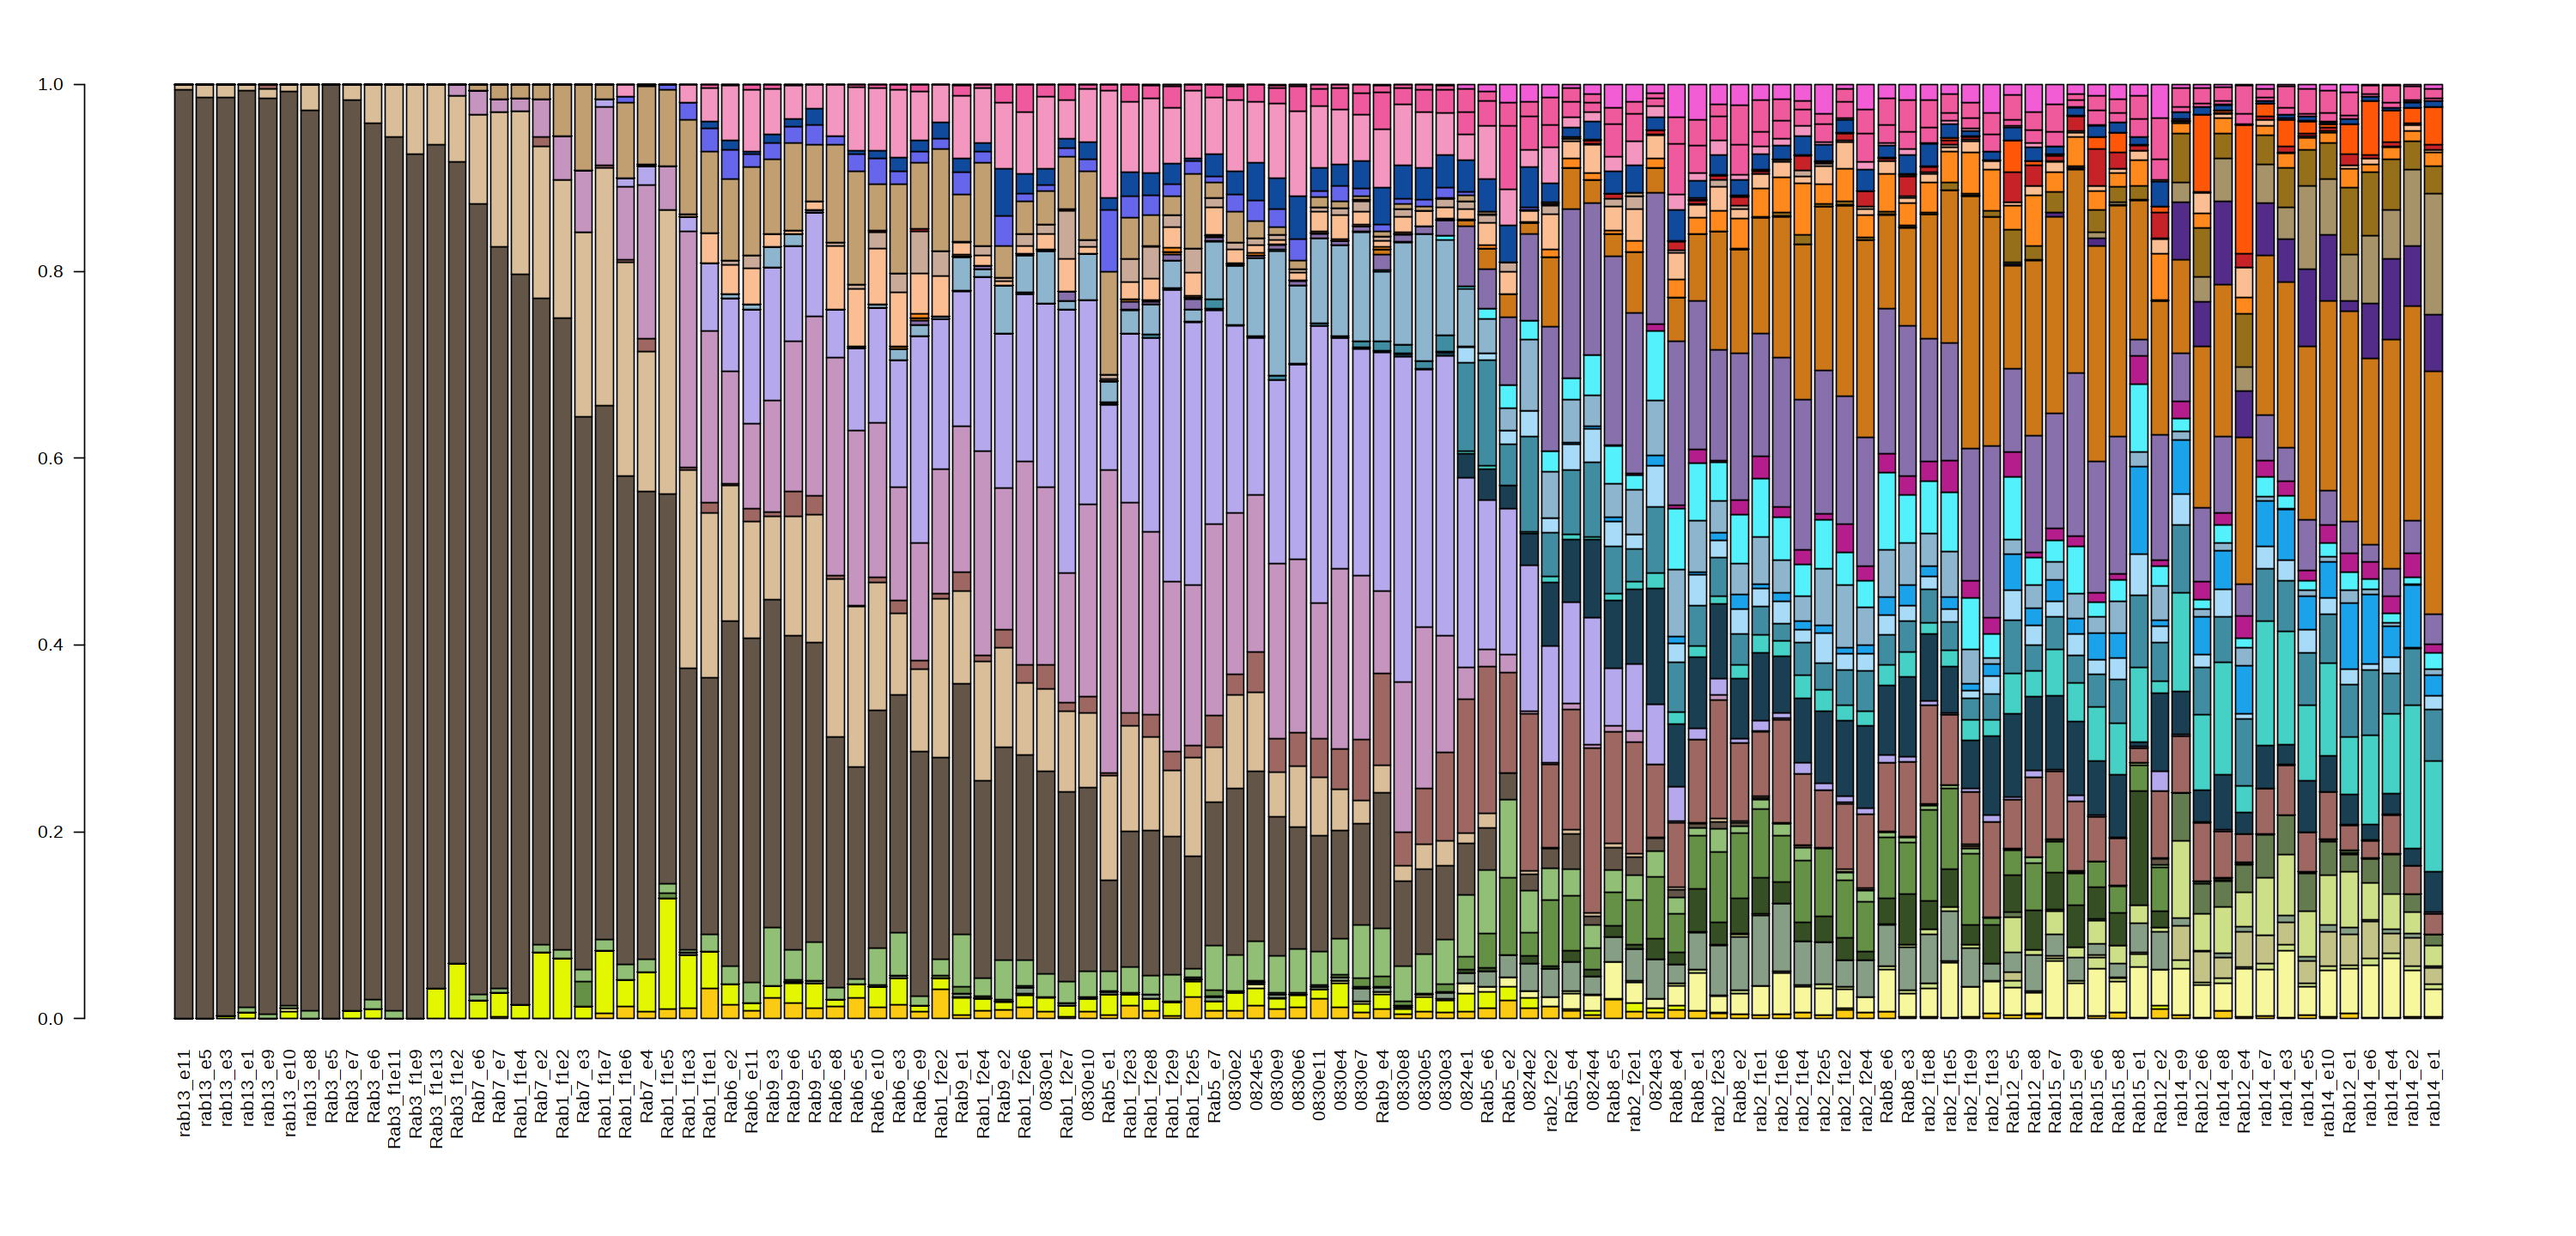

In [43]:
options(repr.plot.width=25, repr.plot.height=12)
# pdf("freq_plot.pdf", width=25, height=12)
op <- par(mar = c(10,4,4,2) + 0.1)
# barplot(t(mc_tn), col=colnames(mc_tn), las=2)
barplot(t(mc_tn[mega_order, color_ord]), col=color_ord, las=2)
# barplot(t(mc_tn[order(-mc_tn[,"#635547"]),color_ord]), col=colnames(mc_tn[,color_ord]), las=2)
# barplot(t(mc_tn[order(-(mc_tn[,"#635547"]-mc_tn[,'#A69369']-mc_tn[,'#89AB69']-mc_tn[,'#FA5F05']-mc_tn[,'#966F1B']-mc_tn[,'#005579']-mc_tn[,'#13095C'])),color_ord]), col=colnames(mc_tn[,color_ord]), las=2)
# dev.off()
# par(op) ## reset


In [33]:
a = slanter::slanted_reorder(data = as.matrix(dist(mc_tn[transcriptional_rank,color_ord])),order_data = as.matrix(dist(mc_tn[transcriptional_rank,color_ord])),same_order = F)

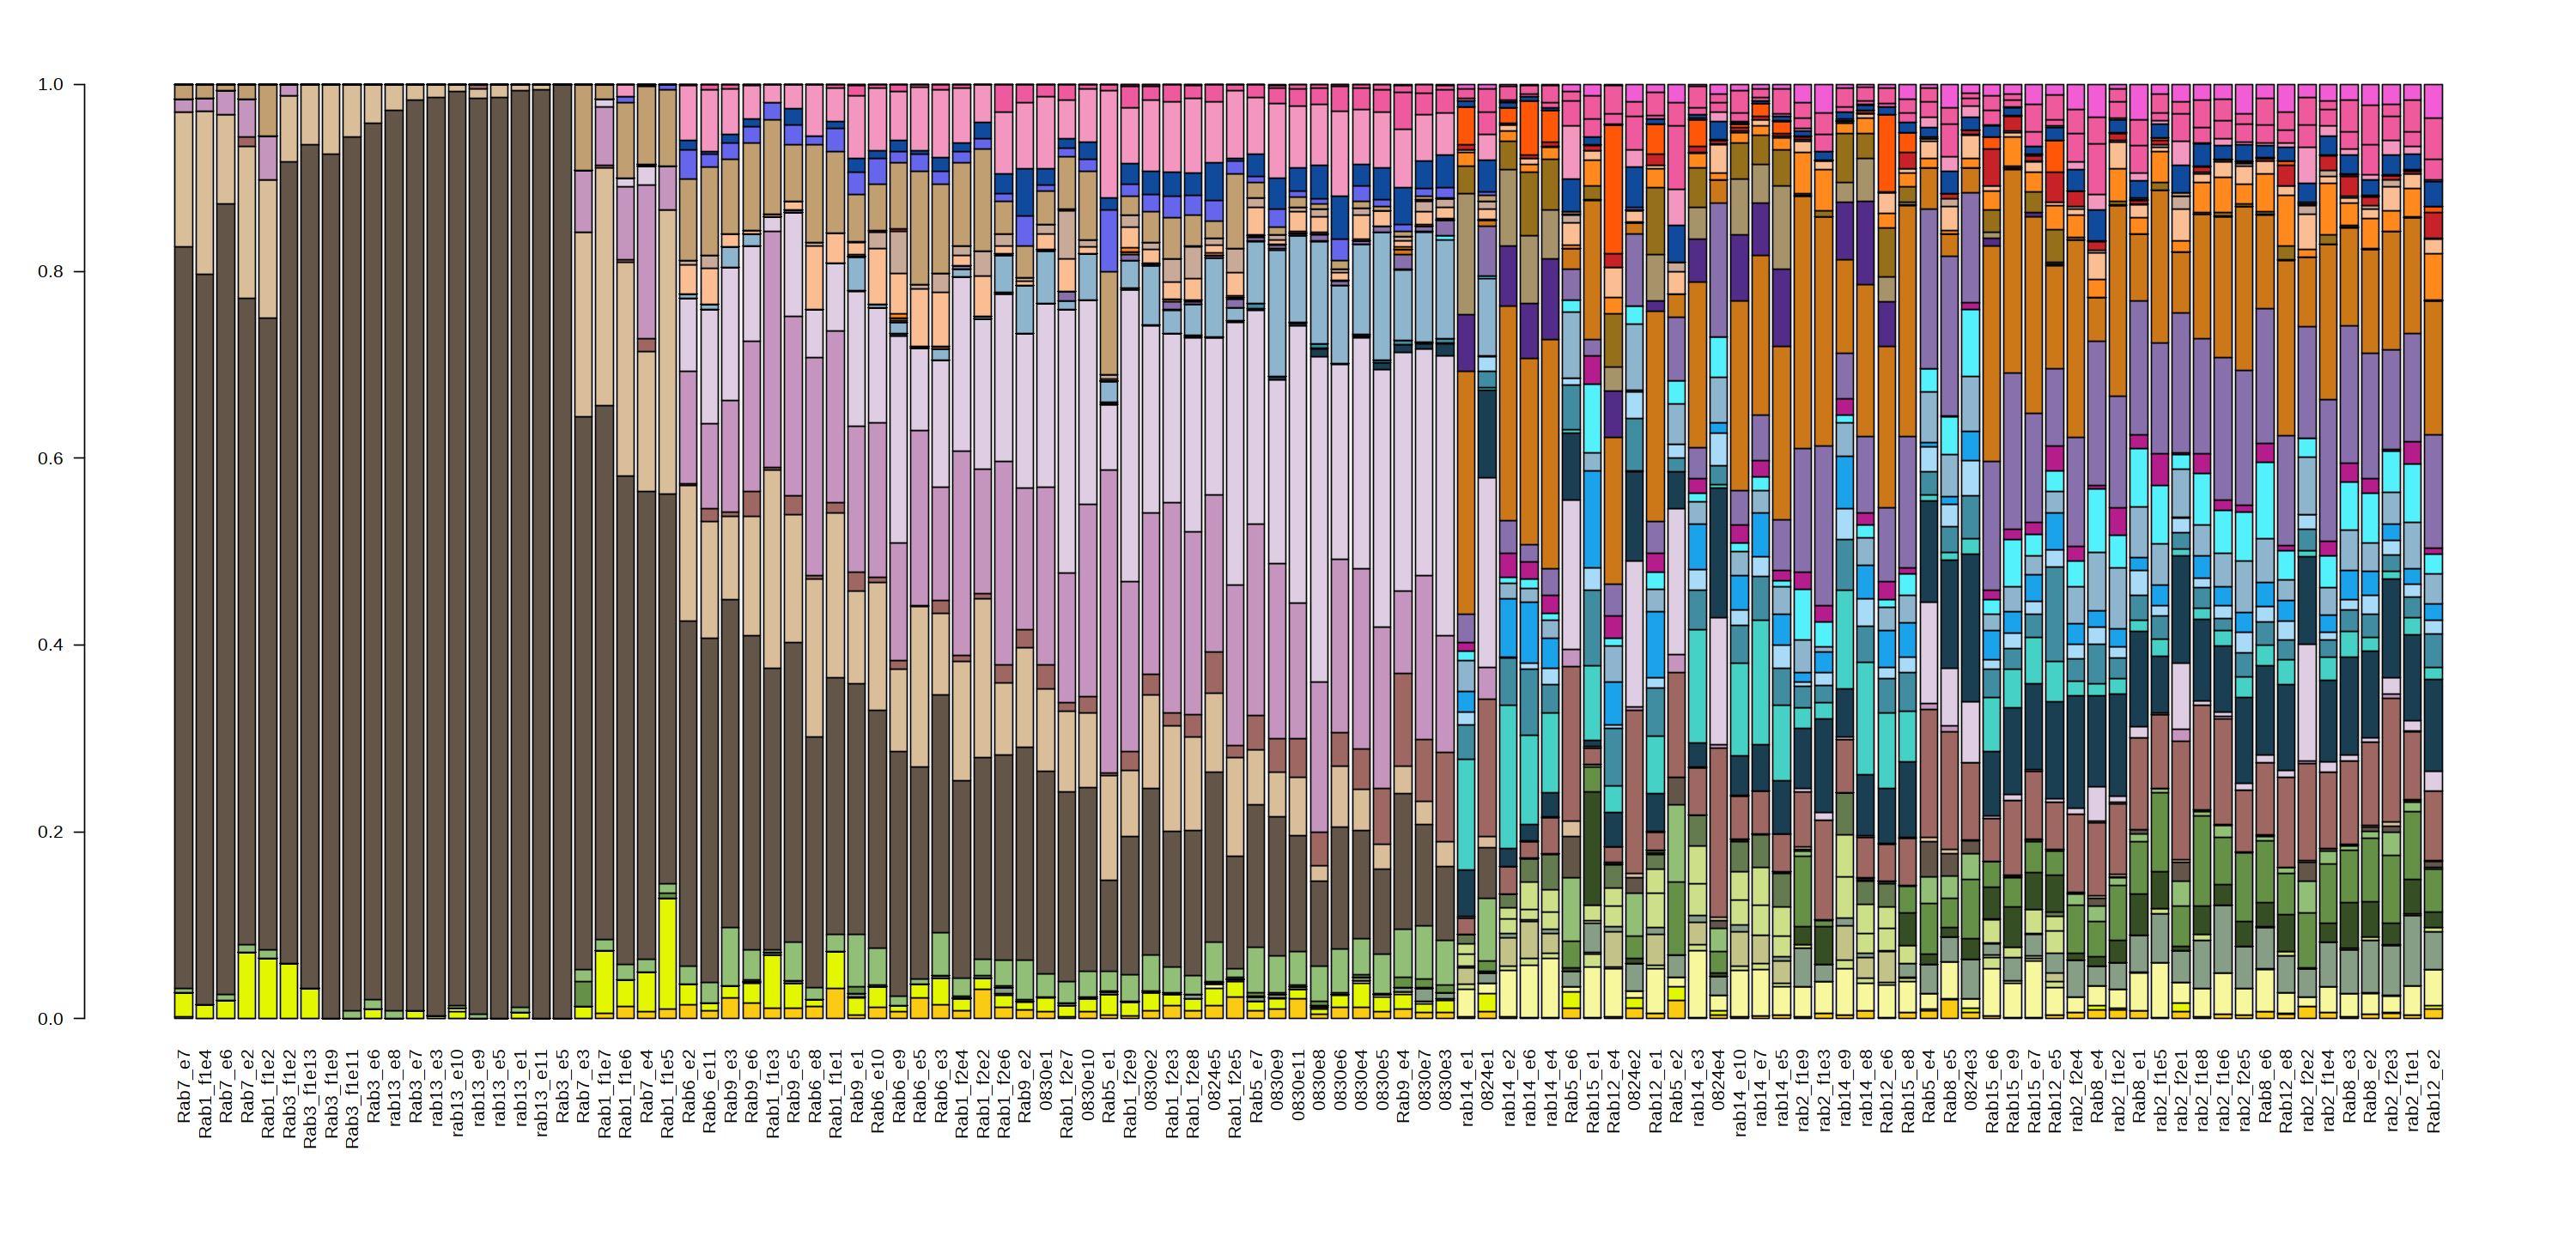

In [48]:
options(repr.plot.width=25, repr.plot.height=12)
# pdf("freq_plot.pdf", width=25, height=12)
op <- par(mar = c(10,4,4,2) + 0.1)
# barplot(t(mc_tn), col=colnames(mc_tn), las=2)
barplot(t(mc_tn[rev(rownames(a)),color_ord]), col=colnames(mc_tn[,color_ord]), las=2)

In [35]:
print(rownames(a))

  [1] "Rab12_e2"   "rab2_f1e1"  "rab2_f2e3"  "Rab8_e2"    "Rab8_e3"   
  [6] "rab2_f1e4"  "rab2_f2e2"  "Rab12_e8"   "Rab8_e6"    "rab2_f2e5" 
 [11] "rab2_f1e6"  "rab2_f1e8"  "rab2_f2e1"  "rab2_f1e5"  "Rab8_e1"   
 [16] "rab2_f1e2"  "Rab8_e4"    "rab2_f2e4"  "Rab12_e5"   "Rab15_e7"  
 [21] "Rab15_e9"   "Rab15_e6"   "0824e3"     "Rab8_e5"    "Rab5_e4"   
 [26] "Rab15_e8"   "Rab12_e6"   "rab14_e8"   "rab14_e9"   "rab2_f1e3" 
 [31] "rab2_f1e9"  "rab14_e5"   "rab14_e7"   "rab14_e10"  "0824e4"    
 [36] "rab14_e3"   "Rab5_e2"    "Rab12_e1"   "0824e2"     "Rab12_e4"  
 [41] "Rab15_e1"   "Rab5_e6"    "rab14_e4"   "rab14_e6"   "rab14_e2"  
 [46] "0824e1"     "rab14_e1"   "0830e3"     "0830e7"     "Rab9_e4"   
 [51] "0830e5"     "0830e4"     "0830e6"     "0830e8"     "0830e11"   
 [56] "0830e9"     "Rab5_e7"    "Rab1_f2e5"  "0824e5"     "Rab1_f2e8" 
 [61] "Rab1_f2e3"  "0830e2"     "Rab1_f2e9"  "Rab5_e1"    "0830e10"   
 [66] "Rab1_f2e7"  "0830e1"     "Rab9_e2"    "Rab1_f2e6"  "Rab1_f2e2" 
 [71] 

In [36]:
sim_mat_reorder_rows_and_cols = function(ee_mat) {
  
  count = 0
  n_emb = ncol(ee_mat)
  n_iter_max = 10000
  n_iter = 0
  delta_count = 1
  
  e_order = c(1:nrow(ee_mat))
  
  
  while ((n_iter < n_iter_max)  & (delta_count > 0) ) {
    
    old_count = count
    n_iter = n_iter + 1
    
    for(i in 1:(n_emb-1)) {
      
      #embryo = embryos[i]
      #next_embryo = embryos[i+1]
      
      if (i == 1) {
        #row_2 = sum(ee_mat[embryo,(i+2):n_emb]) - sum(ee_mat[next_embryo,(i+2):n_emb])
        #col_2 = sum(ee_mat[(i+2):n_emb,embryo]) - sum(ee_mat[(i+2):n_emb,next_embryo])
        row_2 = sum(ee_mat[i,(i+2):n_emb]) - sum(ee_mat[i+1,(i+2):n_emb])
        col_2 = sum(ee_mat[(i+2):n_emb,i]) - sum(ee_mat[(i+2):n_emb,i+1])
        if (row_2 +col_2 > 0) {
          #embryos[i] = next_embryo
          #embryos[i+1] = embryo
          e_order[c(i,i+1)] = e_order[c(i+1,i)]
          ee_mat[c(i,i+1),] = ee_mat[c(i+1,i),]
          ee_mat[,c(i,i+1)] = ee_mat[,c(i+1,i)]
          #ee_mat = ee_mat[embryos,embryos]
          count = count + 1 
        }
      } else if (i == (n_emb-1)) {
        #row_1 = sum(ee_mat[embryo,1:(i-1)]) - sum(ee_mat[next_embryo,1:(i-1)])
        #col_1 = sum(ee_mat[1:(i-1),embryo]) - sum(ee_mat[1:(i-1),next_embryo])
        row_1 = sum(ee_mat[i,1:(i-1)]) - sum(ee_mat[i+1,1:(i-1)])
        col_1 = sum(ee_mat[1:(i-1),i]) - sum(ee_mat[1:(i-1),i+1])
        if (row_1 + col_1 > 0) {
          #embryos[i] = next_embryo
          #embryos[i+1] = embryo
          #ee_mat = ee_mat[embryos,embryos]
          e_order[c(i,i+1)] = e_order[c(i+1,i)]
          ee_mat[c(i,i+1),] = ee_mat[c(i+1,i),]
          ee_mat[,c(i,i+1)] = ee_mat[,c(i+1,i)]
          count = count + 1 
        }
        
      } else {
        #row_1 = sum(ee_mat[embryo,1:(i-1)]) - sum(ee_mat[next_embryo,1:(i-1)])
        #row_2 = sum(ee_mat[embryo,(i+2):n_emb]) - sum(ee_mat[next_embryo,(i+2):n_emb])
        #col_1 = sum(ee_mat[1:(i-1),embryo]) - sum(ee_mat[1:(i-1),next_embryo])
        #col_2 = sum(ee_mat[(i+2):n_emb,embryo]) - sum(ee_mat[(i+2):n_emb,next_embryo])
        row_1 = sum(ee_mat[i,1:(i-1)]) - sum(ee_mat[i+1,1:(i-1)])
        row_2 = sum(ee_mat[i,(i+2):n_emb]) - sum(ee_mat[i+1,(i+2):n_emb])
        col_1 = sum(ee_mat[1:(i-1),i]) - sum(ee_mat[1:(i-1),i+1])
        col_2 = sum(ee_mat[(i+2):n_emb,i]) - sum(ee_mat[(i+2):n_emb,i+1])
        
        if (row_2 - row_1 + col_2 - col_1 > 0) { 
          #embryos[i] = next_embryo
          #embryos[i+1] = embryo
          #ee_mat = ee_mat[embryos,embryos]
          e_order[c(i,i+1)] = e_order[c(i+1,i)]
          ee_mat[c(i,i+1),] = ee_mat[c(i+1,i),]
          ee_mat[,c(i,i+1)] = ee_mat[,c(i+1,i)]
          count = count + 1 
        }
      }
      
      
    }
    delta_count = count - old_count
    print(delta_count)
  }
  
  colnames(ee_mat) = colnames(ee_mat)[e_order]
  rownames(ee_mat) = colnames(ee_mat)
  
  return(list(mat_reshuffled = ee_mat,final_order = e_order))
}


sim_mat_correct_for_batch_effects = function(ee_mat,embryo_coarse_time,embryo_batch) {
  
  embryo_coarse_time = embryo_coarse_time[names(embryo_coarse_time) %in% rownames(ee_mat)]
  embryo_batch = embryo_batch[names(embryo_batch) %in% rownames(ee_mat)]
  
  batches = unique(embryo_batch)
  
  for (batch in batches) {
    
    emb_batch = names(embryo_batch)[embryo_batch == batch]
    
    time_points = unique(embryo_coarse_time[emb_batch])
    other_embryos = setdiff(names(embryo_coarse_time)[embryo_coarse_time %in% time_points],emb_batch)
    
    intra_batch_sim = sum(ee_mat[emb_batch,emb_batch])/(length(emb_batch)*(length(emb_batch)-1))
    inter_batch_sim = sum(ee_mat[emb_batch,other_embryos])/(length(emb_batch)*length(other_embryos))
    
    if((length(emb_batch) > 1) & (intra_batch_sim > 0) & (length(other_embryos) > 1)) {
      ee_mat[emb_batch,emb_batch] = ee_mat[emb_batch,emb_batch]/intra_batch_sim*inter_batch_sim
    }
   
  }
  
  return(ee_mat)
}


generate_emb_emb_similarity_matrix = function(mat_id,graph_id,mc_id,md,included_embryos = NULL,excluded_mcs = NULL,number_of_neighbors = 50,remove_diagonal = TRUE) {
  cgraph = scdb_cgraph(graph_id)
  mat = scdb_mat(mat_id)
  mc = scdb_mc(mc_id)
  
  cls_a = names(mc@mc)[!is.na(md[names(mc@mc),"embryo"])]
  cls_a = intersect(cls_a,colnames(mat@mat))
  
  if(is.null(included_embryos)) {
    included_embryos = unique(md[cls_a,"embryo"])
  }
  included_embryos = intersect(included_embryos,unique(md[cls_a,"embryo"]))
  
  included_mcs =  setdiff(c(1:ncol(mc@e_gc)),excluded_mcs)
  included_cells = cls_a[(mc@mc[cls_a] %in% included_mcs) & (md[cls_a,"embryo"] %in% included_embryos)]
  
  
  cell_to_embryo = as.character(md[included_cells,"embryo"])
  names(cell_to_embryo) = included_cells
  
  # prepare list of edges
  included_edges = cgraph@edges[(( cgraph@edges$mc1 %in% included_cells ) & ( cgraph@edges$mc2 %in% included_cells )),]
  included_edges$mc1 = factor(x = as.character(included_edges$mc1),levels = included_cells)
  included_edges$mc2 = factor(x = as.character(included_edges$mc2),levels = included_cells)
  included_edges$emb1 = factor(cell_to_embryo[included_edges$mc1],levels = included_embryos)
  included_edges$emb2 = factor(cell_to_embryo[included_edges$mc2],levels = included_embryos)
  
  # exclude embryo self edges
  f = included_edges$emb1 != included_edges$emb2
  included_edges = included_edges[f,]
  
  # number of outgoing edges from cell1 should be smaller than number_of_neighbors
  # filter edges with highest rank
  
  f_edges = tapply(X = c(1:nrow(included_edges)),INDEX = included_edges$mc1,function(n_ind) {
    
    if(length(n_ind) > number_of_neighbors) {
      n_ind = n_ind[order(-included_edges$w[n_ind])]
      n_ind = n_ind[1:number_of_neighbors]
    }
    return(n_ind)
  })
  f_edges = unlist(f_edges)
  
  included_edges = included_edges[f_edges,]
  
  # generate similarity matrix by counting edges between two embryos
  mat_emb_neighbors = table(included_edges$emb1,
                            included_edges$emb2)
  
  mat_emb_neighbors = as.matrix(as.data.frame.matrix(mat_emb_neighbors))
  
  #mat_emb_neighbors = 1/2*(mat_emb_neighbors + t(mat_emb_neighbors))
  
  embryo_weight = table(md[included_cells,"embryo"])
  embryo_weight = embryo_weight[rownames(mat_emb_neighbors)]
  
  # Normalize each column by the total number of cells this embryo has.
  mat_emb_neighbors = t(t(mat_emb_neighbors)/as.numeric(embryo_weight))
  #mat_emb_neighbors = mat_emb_neighbors/as.numeric(embryo_weight)
  
  
  if(remove_diagonal) {
    diag(mat_emb_neighbors) = 0
  }
  mat_emb_neighbors = mat_emb_neighbors/rowSums(mat_emb_neighbors)
  mat_emb_neighbors = 1/2*(mat_emb_neighbors + t(mat_emb_neighbors))
  
  
  return(mat_emb_neighbors)
} 

In [50]:
graph_id = "embs85_nohs_noexe"
a = generate_emb_emb_similarity_matrix(mat_id,graph_id,mc_id,md, included_embryos = mega_order)

In [51]:
order = sim_mat_reorder_rows_and_cols(a[mega_order,mega_order])

[1] 61
[1] 38
[1] 22
[1] 21
[1] 13
[1] 11
[1] 5
[1] 2
[1] 2
[1] 0


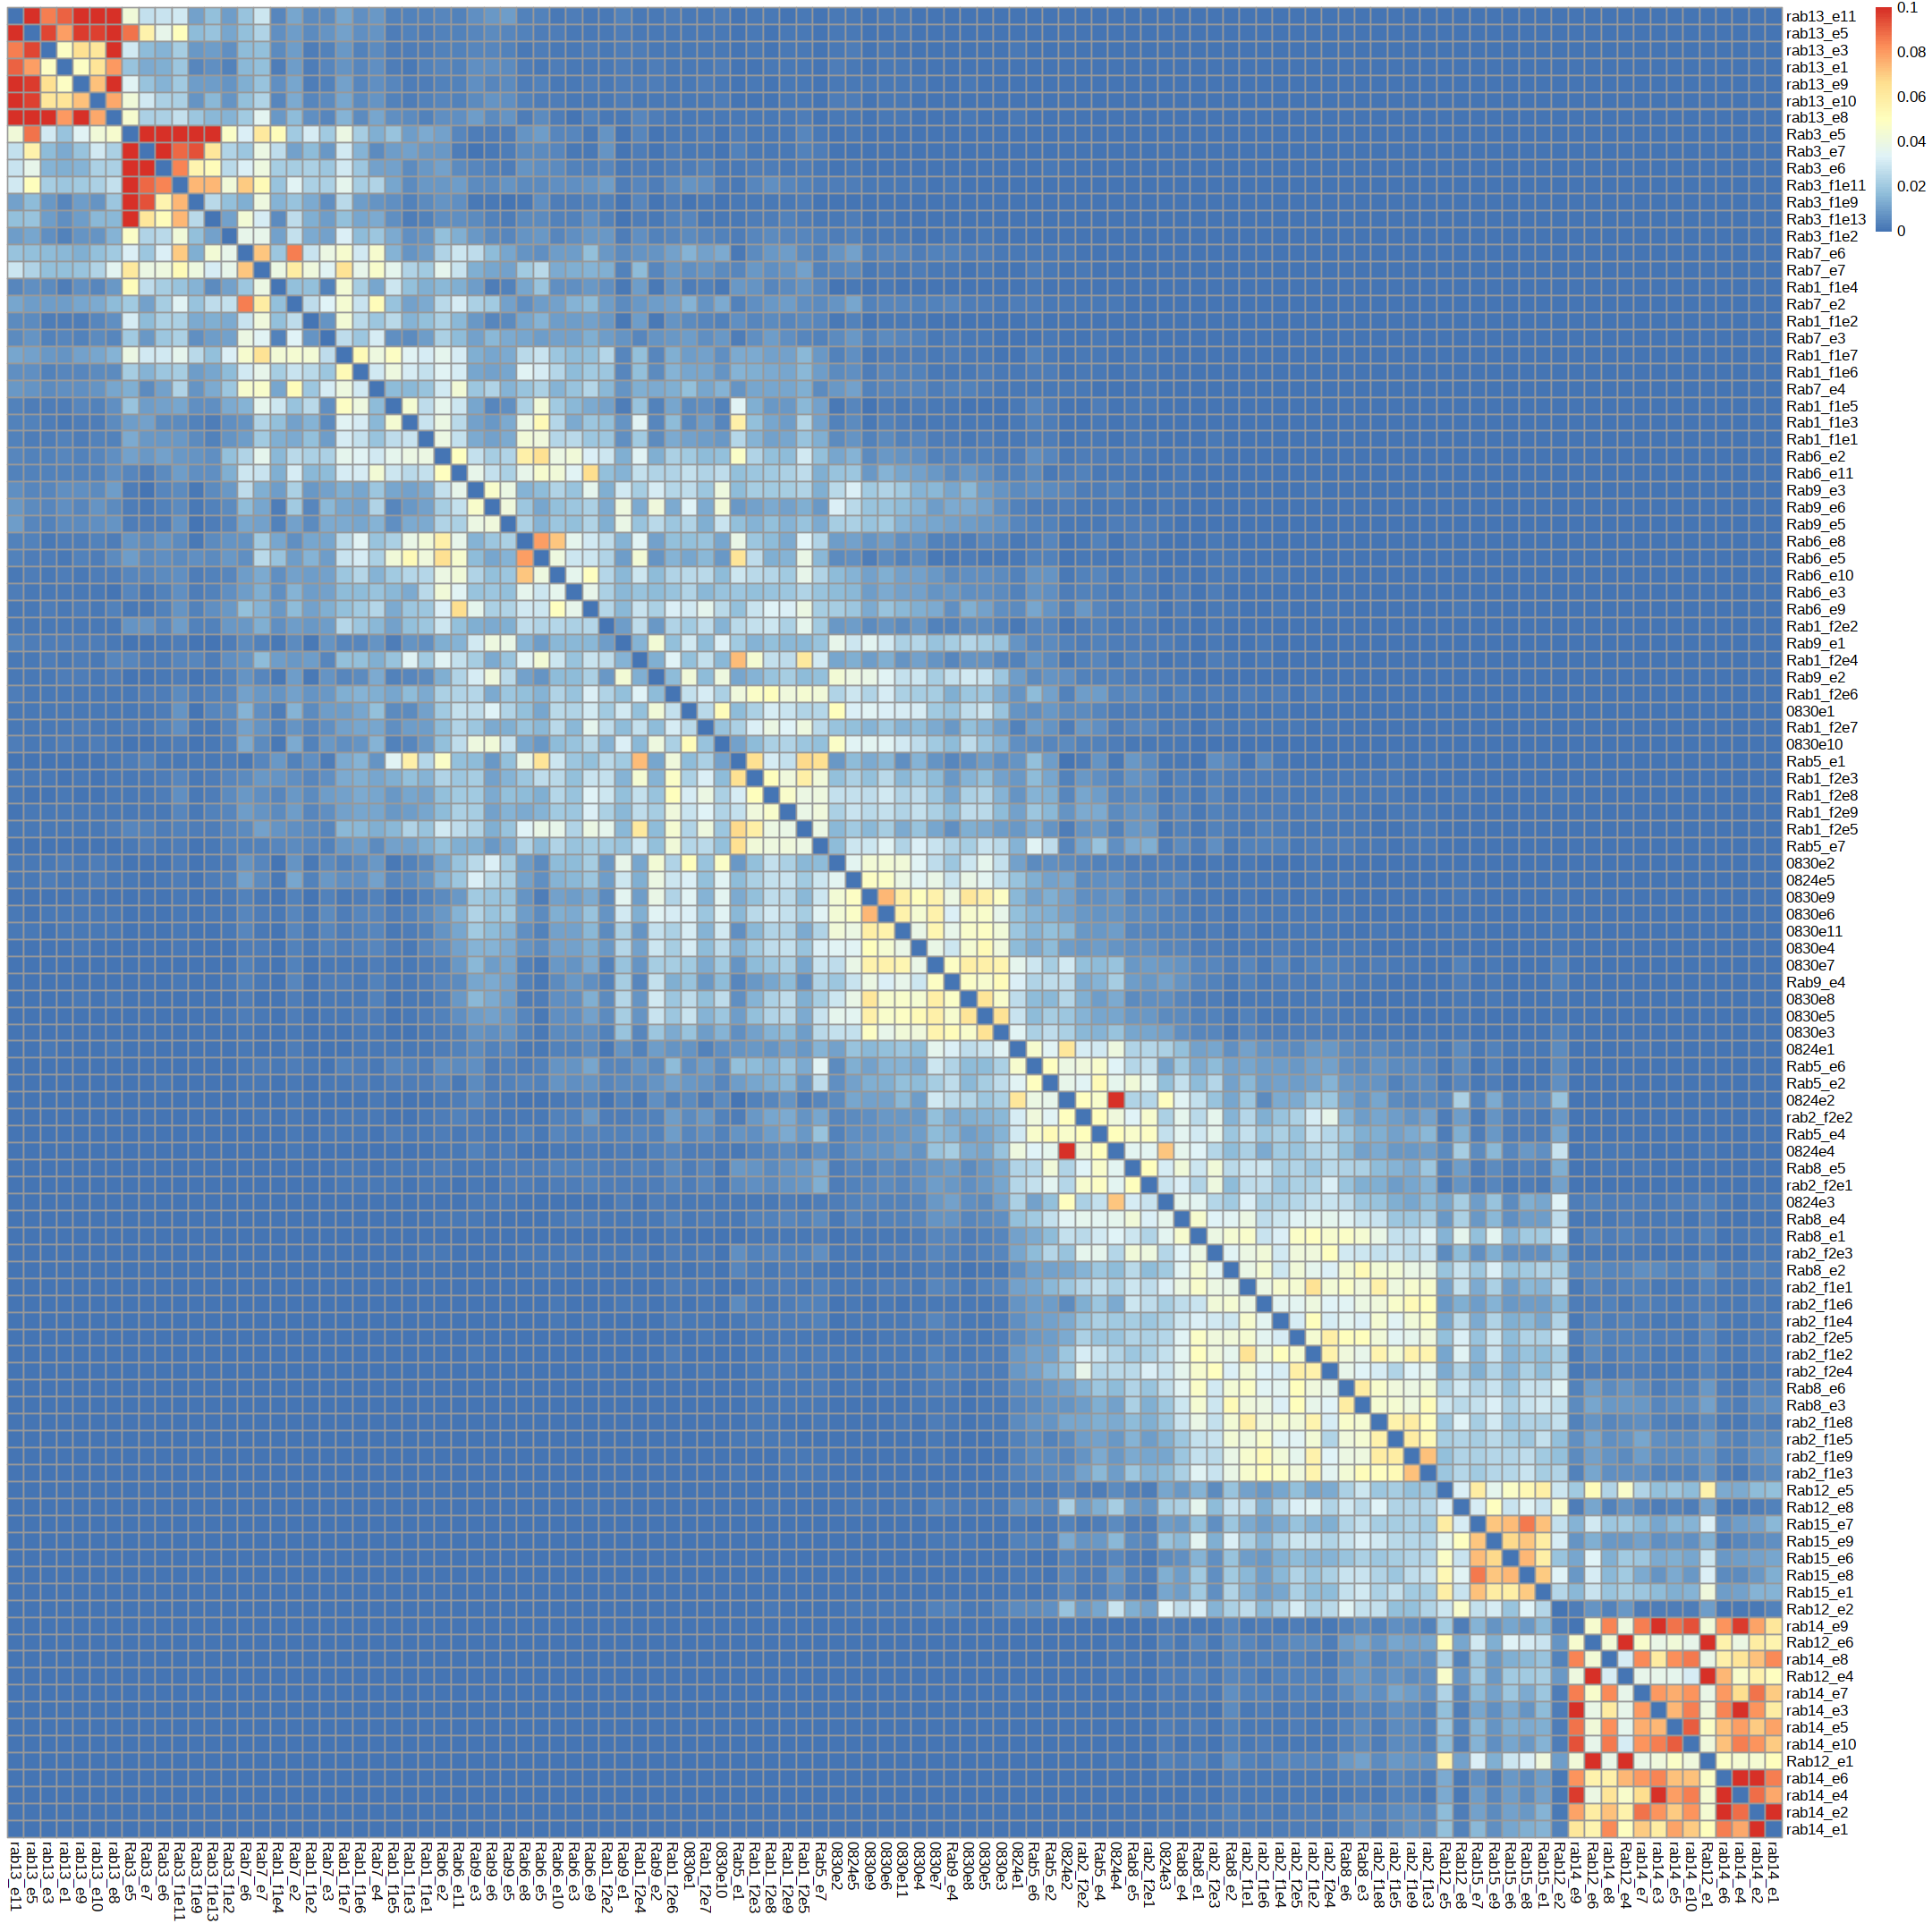

In [53]:
options(repr.plot.width=18, repr.plot.height=18)
ph = pheatmap::pheatmap(pmin(order$mat_reshuffled[mega_order,mega_order],0.1),cluster_rows = F,cluster_cols = F)

In [54]:
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
    stopifnot(!missing(x))
    stopifnot(!missing(filename))
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
}

In [55]:
save_pheatmap_pdf(ph,paste0("emb_emb_knn_sim.pdf"), width=7, height=7)

png 
  2

In [19]:
test = c("rab13_e11","rab13_e5","rab13_e3","rab13_e1","rab13_e9","rab13_e10","rab13_e8","Rab3_e5","Rab3_e7","Rab3_e6","Rab3_f1e11","Rab3_f1e9","Rab3_f1e13","Rab3_f1e2","Rab7_e6","Rab7_e7","Rab1_f1e4","Rab7_e2","Rab1_f1e2","Rab7_e3","Rab1_f1e7","Rab1_f1e6","Rab7_e4","Rab1_f1e5","Rab1_f1e3","Rab1_f1e1","Rab6_e2","Rab6_e11","Rab9_e3","Rab9_e6","Rab9_e5","Rab6_e8","Rab6_e5","Rab6_e10","Rab6_e3","Rab6_e9","Rab1_f2e2","Rab9_e1","Rab1_f2e4","Rab9_e2","Rab1_f2e6","0830e1","Rab1_f2e7","0830e10","Rab5_e1","Rab1_f2e3","Rab1_f2e8","Rab1_f2e9","Rab1_f2e5","Rab5_e7","0830e2","0824e5","0830e9","0830e6","0830e11","0830e4","0830e7","Rab9_e4","0830e8","0830e5","0830e3","0824e1","Rab5_e6","Rab5_e2","0824e2","rab2_f2e2","Rab5_e4","0824e4","Rab8_e5","rab2_f2e1","0824e3","Rab8_e4","Rab8_e1","rab2_f2e3","Rab8_e2","rab2_f1e1","rab2_f1e6","rab2_f1e4","rab2_f2e5","rab2_f1e2","rab2_f2e4","Rab8_e6","Rab8_e3","rab2_f1e8","rab2_f1e5","rab2_f1e9","rab2_f1e3","Rab12_e5","Rab12_e8","Rab15_e7","Rab15_e9","Rab15_e6","Rab15_e8","Rab15_e1","Rab12_e2","Rab12_e6","rab14_e8","Rab12_e4","rab14_e7","rab14_e5","rab14_e10","Rab12_e1","rab14_e2","rab14_e1","rab14_e9")

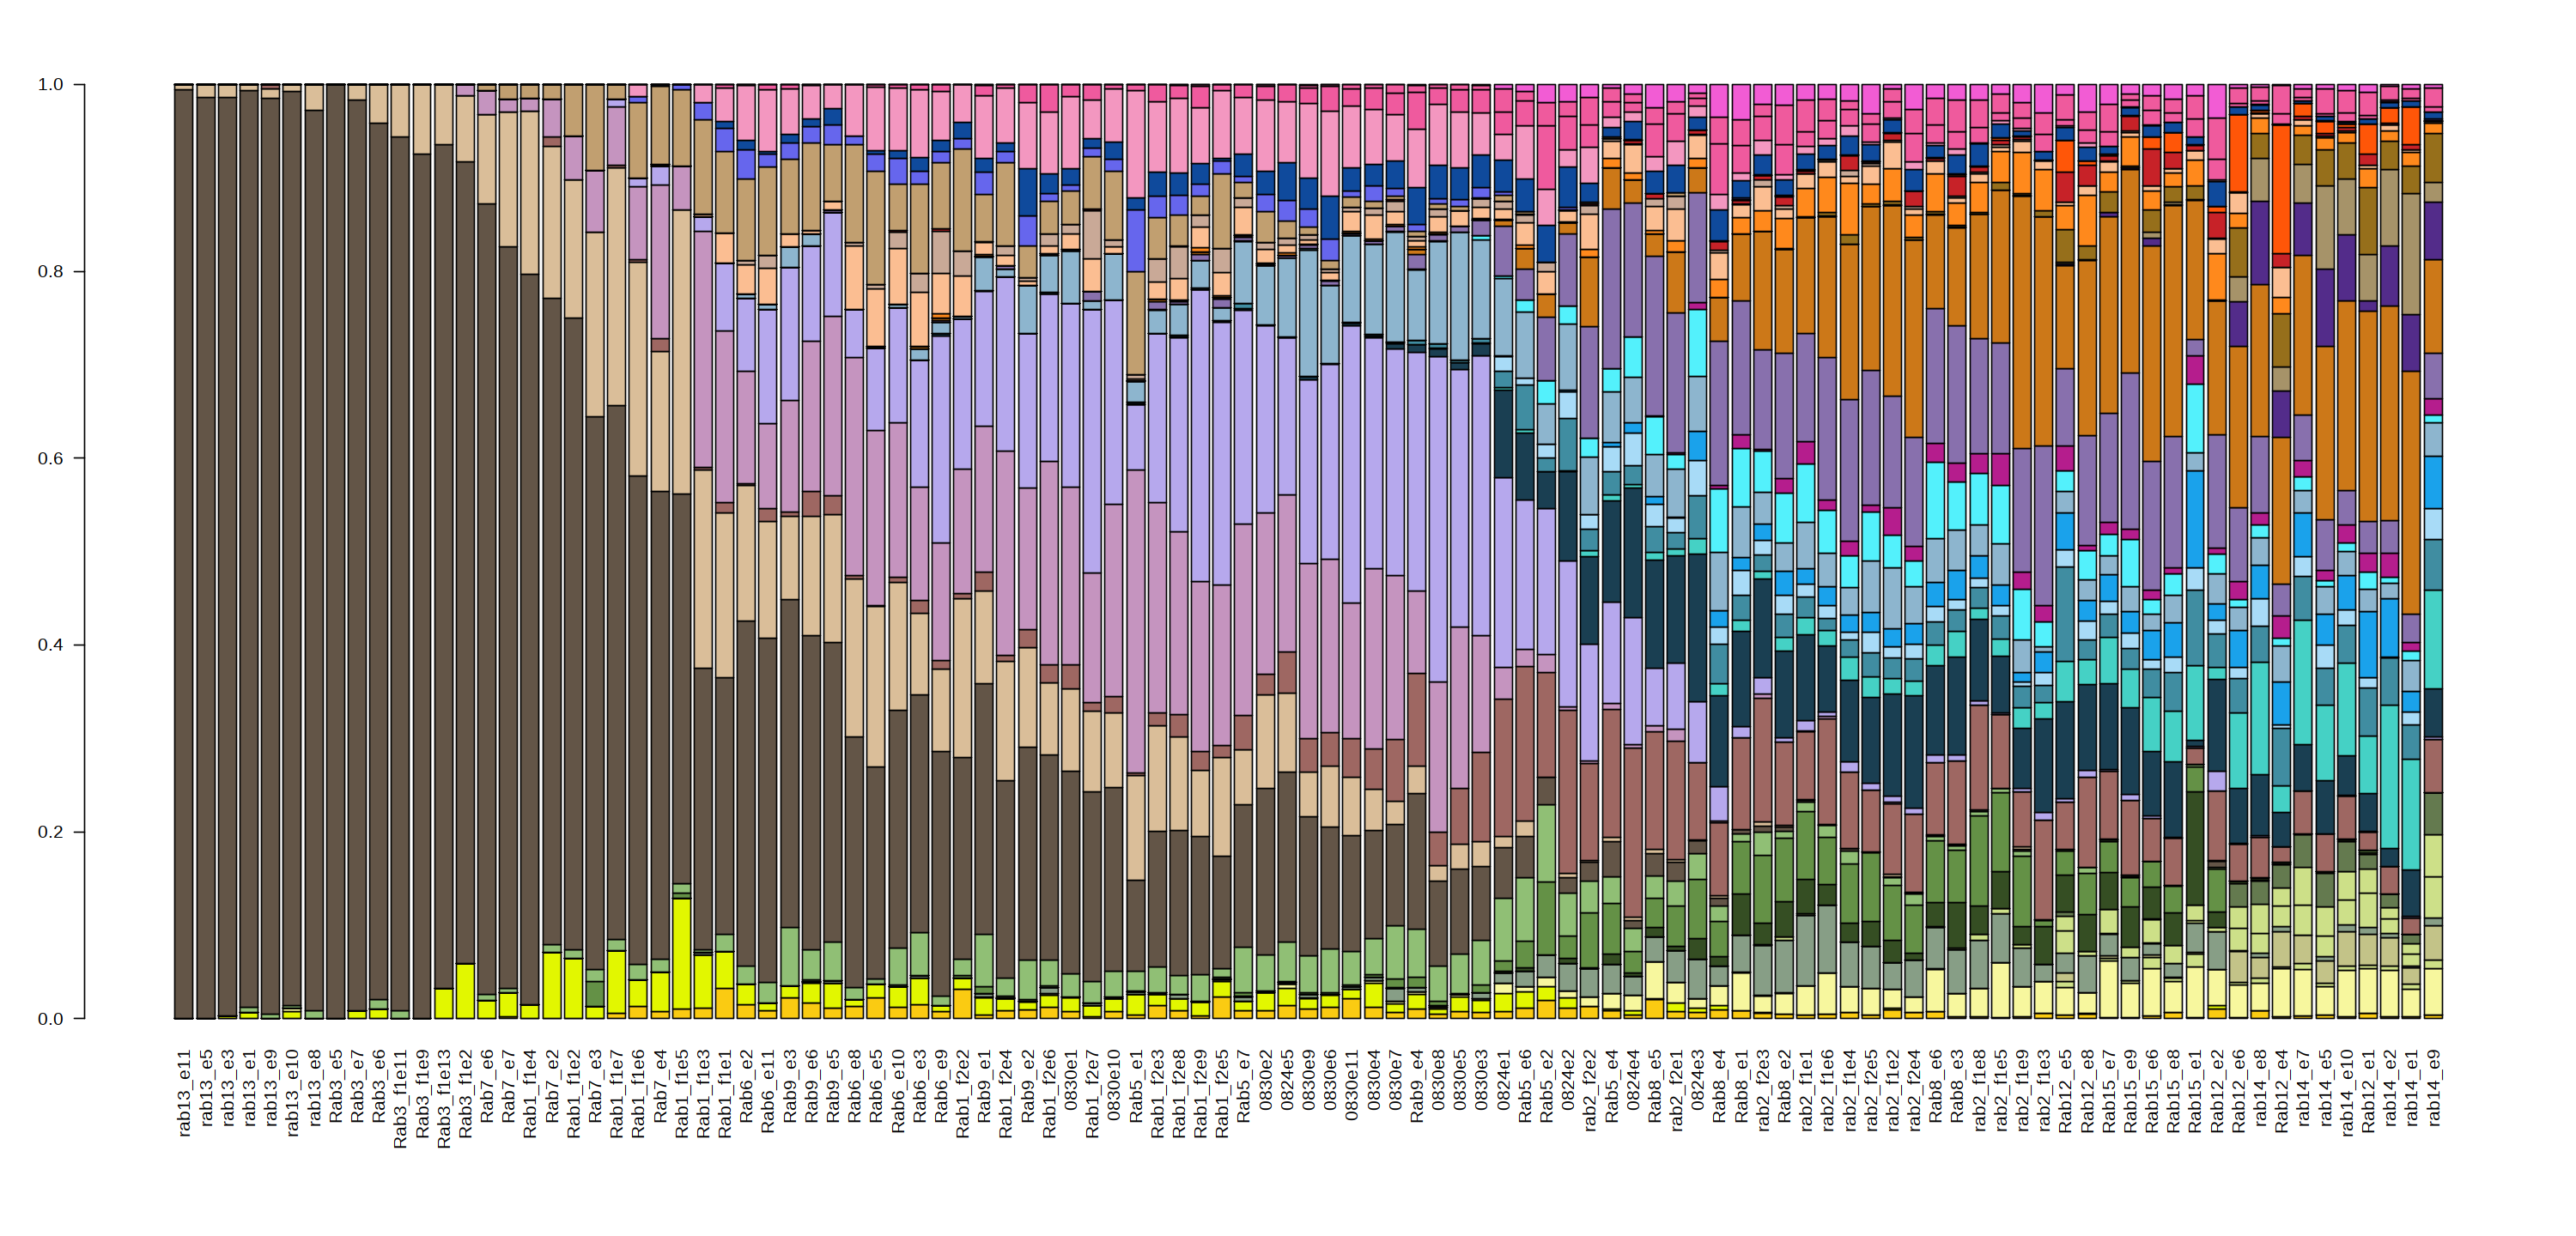

In [22]:
options(repr.plot.width=25, repr.plot.height=12)
# pdf("freq_plot.pdf", width=25, height=12)
op <- par(mar = c(10,4,4,2) + 0.1)
# barplot(t(mc_tn), col=colnames(mc_tn), las=2)
barplot(t(mc_tn[test,color_ord]), col=colnames(mc_tn[,color_ord]), las=2)

In [68]:
library(princurve)
out = principal_curve(mc_tn[rownames(order$mat_reshuffled),color_ord], start=mc_tn[rownames(order$mat_reshuffled),color_ord])

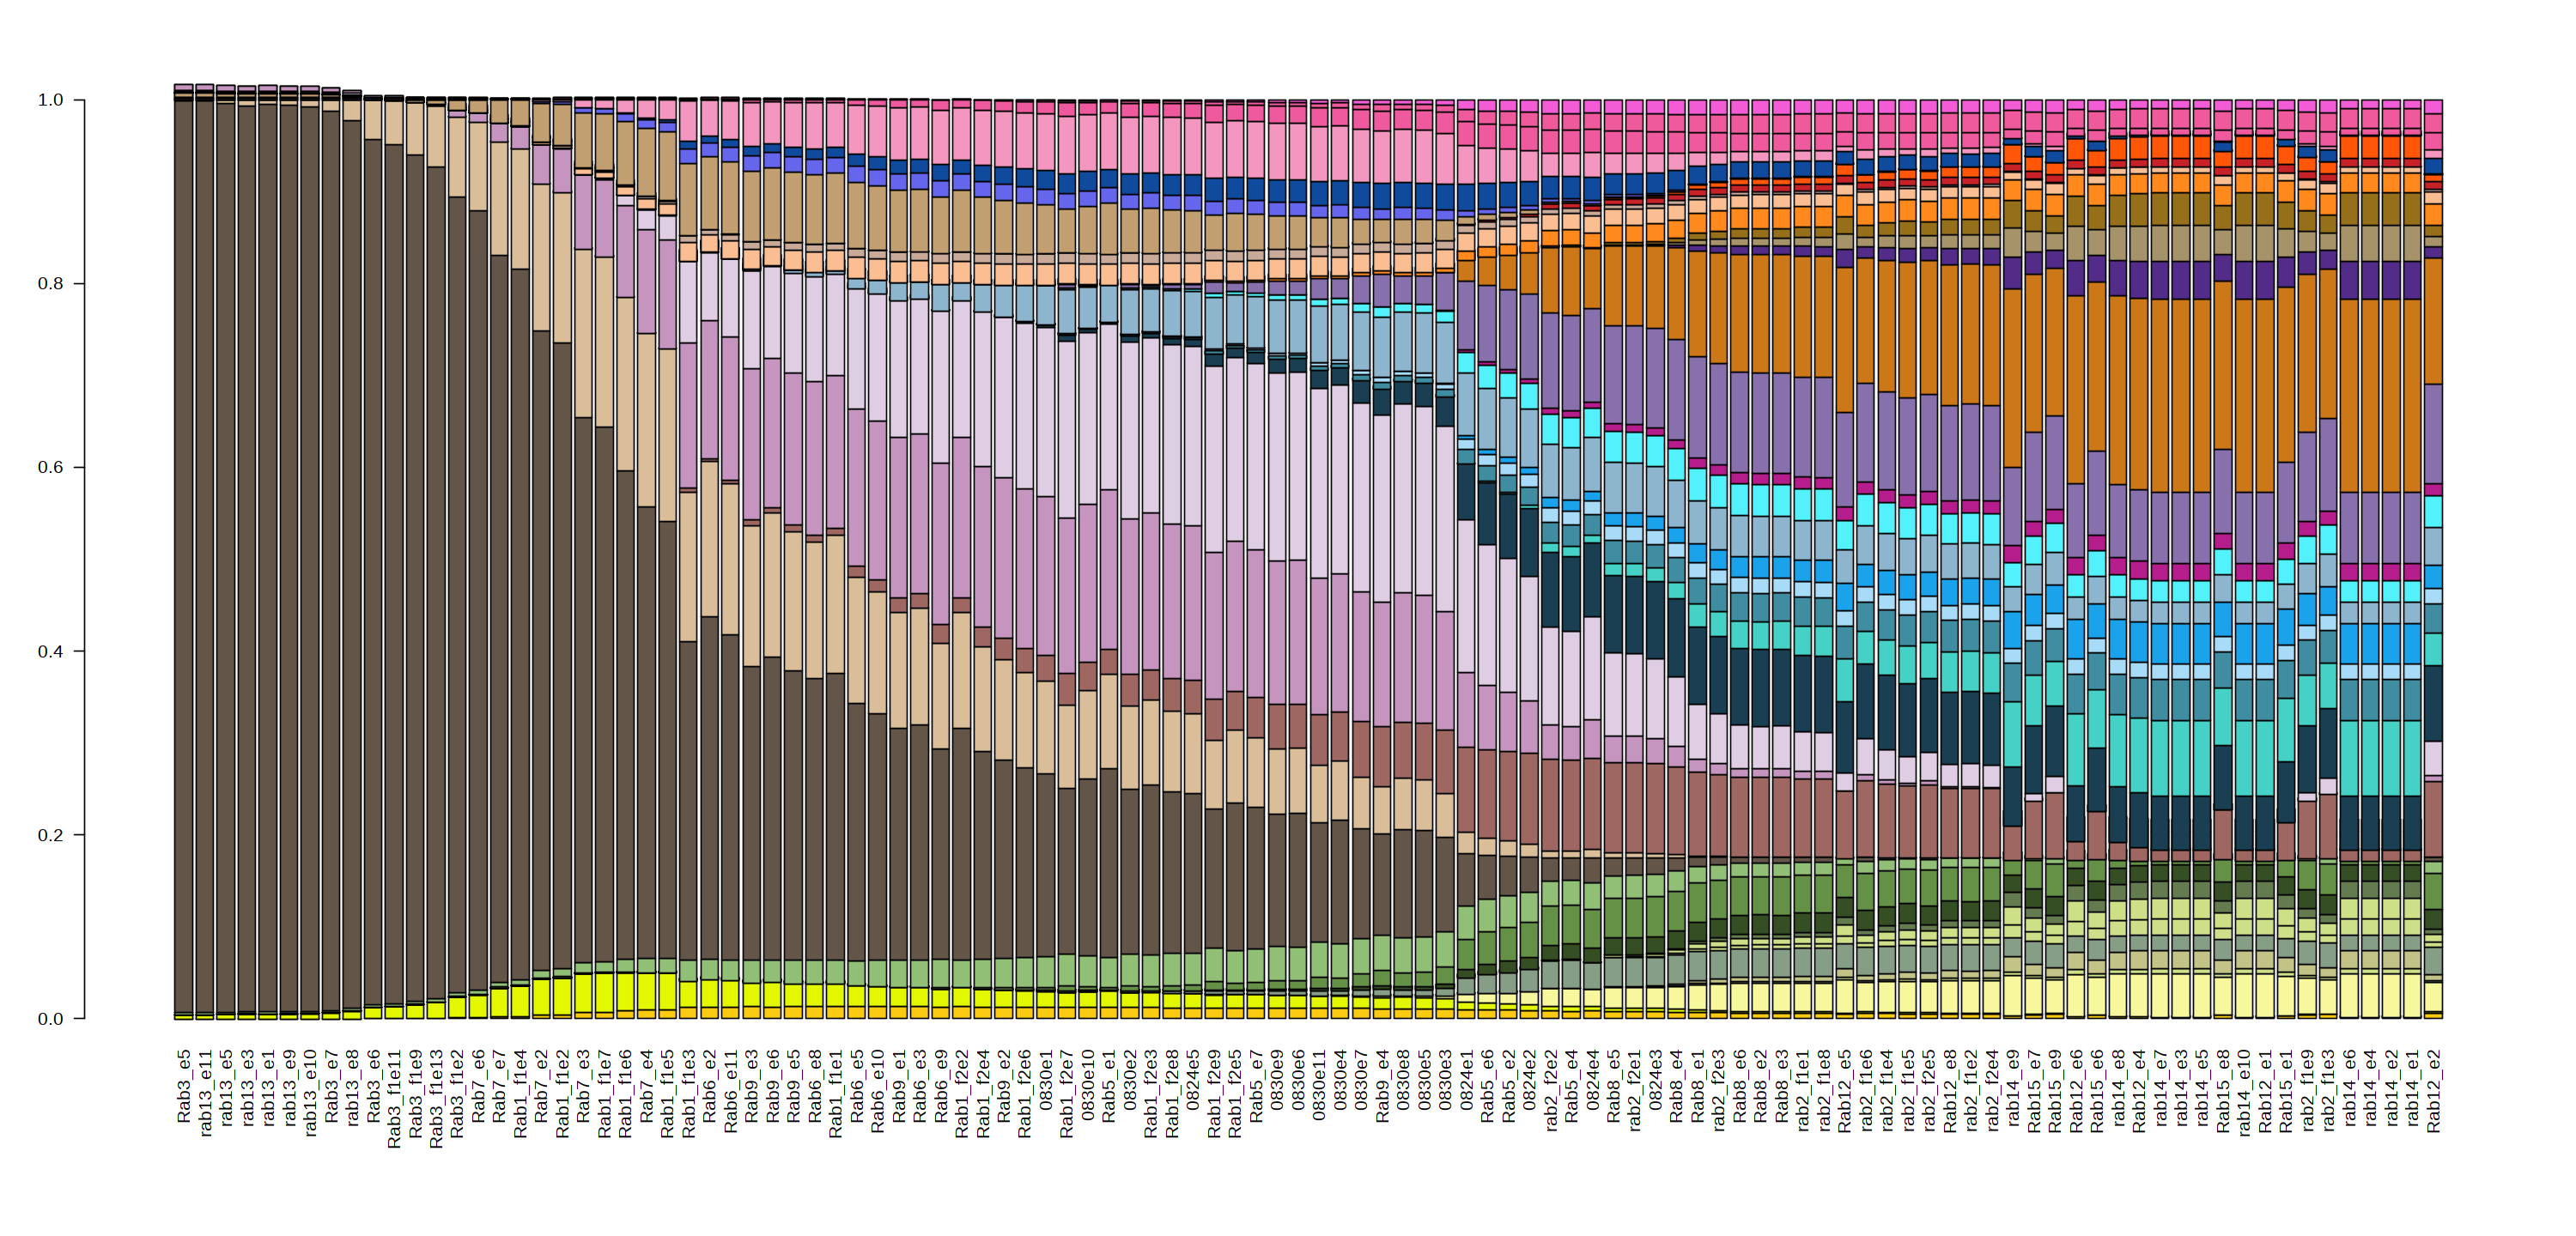

In [74]:
op <- par(mar = c(10,4,4,2) + 0.1)
barplot(t(out$s[,color_ord]), col=colnames(mc_tn[,color_ord]), las=2)

In [80]:
yoav = t(mc_tn[rownames(order$mat_reshuffled),color_ord])[,out$ord]
newnames = paste0(groups$chunk, "__", groups$embryo)
names(newnames) = groups$embryo
colnames(yoav) = newnames[colnames(yoav)]

         
          1__rab13_e11   2__Rab3_e5  1__rab13_e5  1__rab13_e1  1__rab13_e9
  #FACB12 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  #E2F700 0.0000000000 0.0000000000 0.0000000000 0.0061728395 0.0000000000
  #f7f79e 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  #CDE087 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  #C3C388 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  #879E86 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  #CDE089 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  #CDE088 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  #647A4F 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  #354E23 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  #649146 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  #90BF75 0.0000000000 0.0000000000 0.0000000000 0.0061728395 0.0048543689
  #635547 0.994

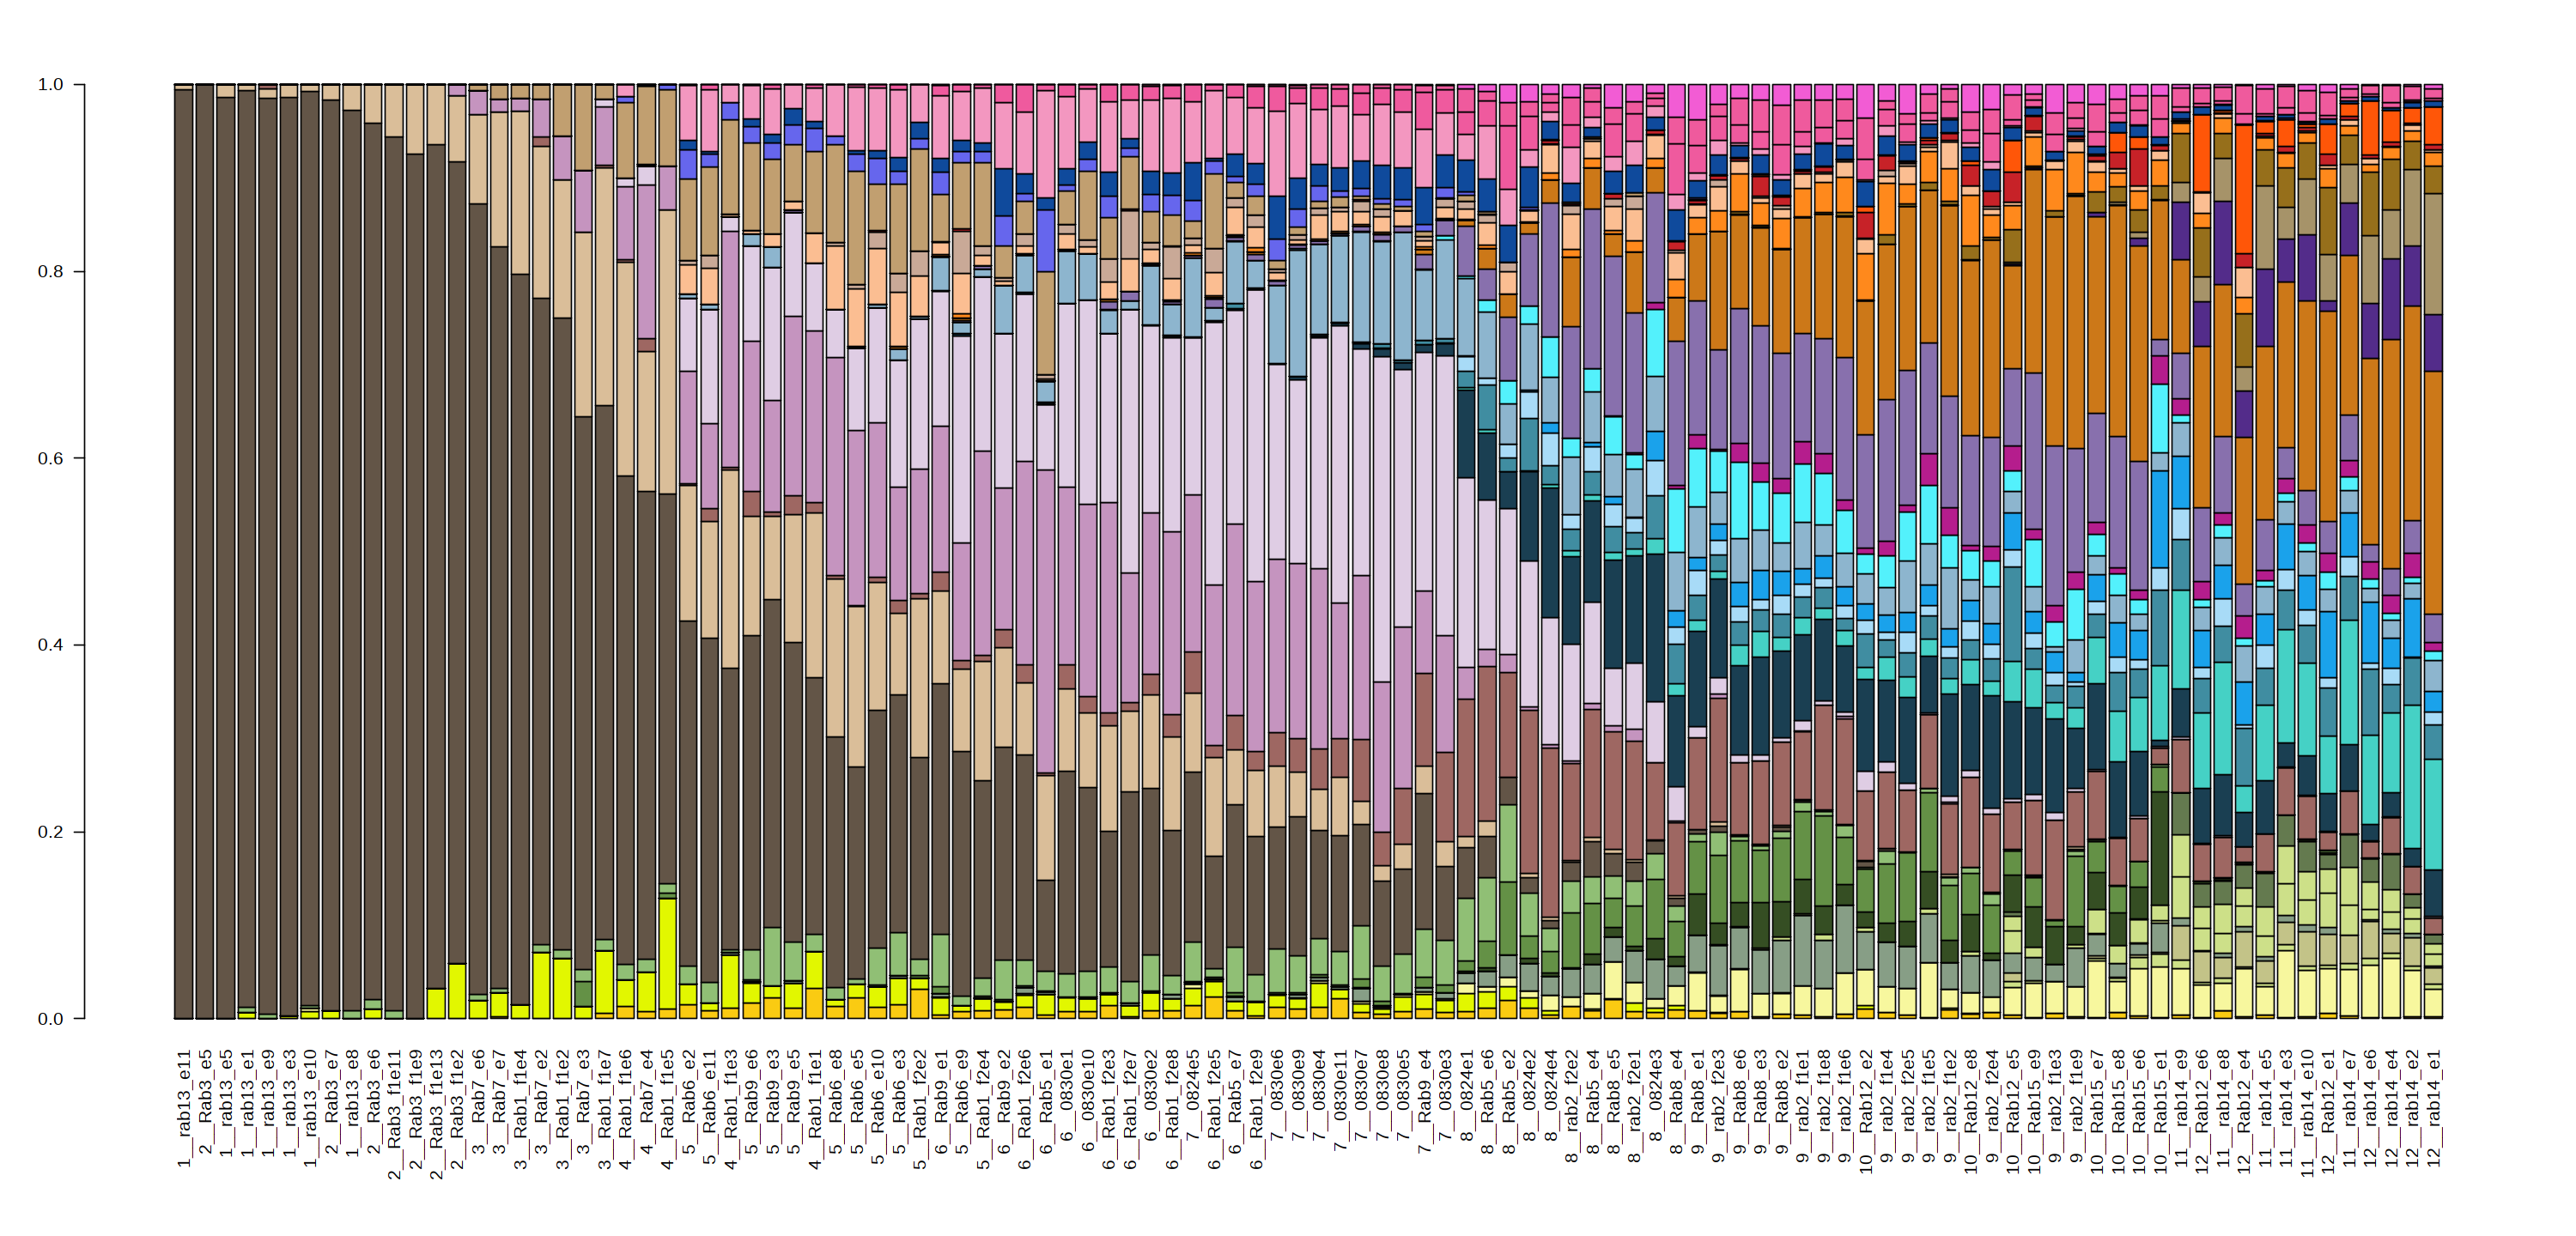

In [86]:
options(repr.plot.width=25, repr.plot.height=12)
# pdf("freq_plot.pdf", width=25, height=12)
op <- par(mar = c(10,4,4,2) + 0.1)
# barplot(t(mc_tn), col=colnames(mc_tn), las=2)
barplot(yoav[color_ord,], col=rownames(yoav[color_ord,]), las=2)

In [99]:
rownames(out$s)

[1] "Rab3_e5"    "rab13_e11"  "rab13_e5"   "rab13_e3"   "rab13_e1"  
  [6] "rab13_e9"   "rab13_e10"  "Rab3_e7"    "rab13_e8"   "Rab3_e6"   
 [11] "Rab3_f1e11" "Rab3_f1e9"  "Rab3_f1e13" "Rab3_f1e2"  "Rab7_e6"   
 [16] "Rab7_e7"    "Rab1_f1e4"  "Rab7_e2"    "Rab1_f1e2"  "Rab7_e3"   
 [21] "Rab1_f1e7"  "Rab1_f1e6"  "Rab7_e4"    "Rab1_f1e5"  "Rab1_f1e3" 
 [26] "Rab6_e2"    "Rab6_e11"   "Rab9_e3"    "Rab9_e6"    "Rab9_e5"   
 [31] "Rab6_e8"    "Rab1_f1e1"  "Rab6_e5"    "Rab6_e10"   "Rab9_e1"   
 [36] "Rab6_e3"    "Rab6_e9"    "Rab1_f2e2"  "Rab1_f2e4"  "Rab9_e2"   
 [41] "Rab1_f2e6"  "0830e1"     "Rab1_f2e7"  "0830e10"    "Rab5_e1"   
 [46] "0830e2"     "Rab1_f2e3"  "Rab1_f2e8"  "0824e5"     "Rab1_f2e9" 
 [51] "Rab1_f2e5"  "Rab5_e7"    "0830e9"     "0830e6"     "0830e11"   
 [56] "0830e4"     "0830e7"     "Rab9_e4"    "0830e8"     "0830e5"    
 [61] "0830e3"     "0824e1"     "Rab5_e6"    "Rab5_e2"    "0824e2"    
 [66] "rab2_f2e2"  "Rab5_e4"    "0824e4"     "Rab8_e5"    "rab2_f2e1" 
 [71] "0824e3"     "Rab8_e4"    "Rab8_e1"    "rab2_f2e3"  "Rab8_e6"   
 [76] "Rab8_e2"    "Rab8_e3"    "rab2_f1e1"  "rab2_f1e8"  "Rab12_e5"  
 [81] "rab2_f1e6"  "rab2_f1e4"  "rab2_f1e5"  "rab2_f2e5"  "Rab12_e8"  
 [86] "rab2_f1e2"  "rab2_f2e4"  "rab14_e9"   "Rab15_e7"   "Rab15_e9"  
 [91] "Rab12_e6"   "Rab15_e6"   "rab14_e8"   "Rab12_e4"   "rab14_e7"  
 [96] "rab14_e3"   "rab14_e5"   "Rab15_e8"   "rab14_e10"  "Rab12_e1"  
[101] "Rab15_e1"   "rab2_f1e9"  "rab2_f1e3"  "rab14_e6"   "rab14_e4"  
[106] "rab14_e2"   "rab14_e1"   "Rab12_e2"

In [ ]:
rab14_e6,
rab14_e4,
rab14_e3,

In [21]:
# This is it! 
mega_order = c("rab13_e11","rab13_e5","rab13_e3","rab13_e1","rab13_e9","rab13_e10","rab13_e8","Rab3_e5","Rab3_e7","Rab3_e6","Rab3_f1e11","Rab3_f1e9","Rab3_f1e13","Rab3_f1e2","Rab7_e6","Rab7_e7","Rab1_f1e4","Rab7_e2","Rab1_f1e2","Rab7_e3","Rab1_f1e7","Rab1_f1e6","Rab7_e4","Rab1_f1e5","Rab1_f1e3","Rab1_f1e1","Rab6_e2","Rab6_e11","Rab9_e3","Rab9_e6","Rab9_e5","Rab6_e8","Rab6_e5","Rab6_e10","Rab6_e3","Rab6_e9","Rab1_f2e2","Rab9_e1","Rab1_f2e4","Rab9_e2","Rab1_f2e6","0830e1","Rab1_f2e7","0830e10","Rab5_e1","Rab1_f2e3","Rab1_f2e8","Rab1_f2e9","Rab1_f2e5","Rab5_e7","0830e2","0824e5","0830e9","0830e6","0830e11","0830e4","0830e7","Rab9_e4","0830e8","0830e5","0830e3","0824e1","Rab5_e6","Rab5_e2","0824e2","rab2_f2e2","Rab5_e4","0824e4","Rab8_e5","rab2_f2e1","0824e3","Rab8_e4","Rab8_e1","rab2_f2e3","Rab8_e2","rab2_f1e1","rab2_f1e6","rab2_f1e4","rab2_f2e5","rab2_f1e2","rab2_f2e4","Rab8_e6","Rab8_e3","rab2_f1e8","rab2_f1e5","rab2_f1e9","rab2_f1e3","Rab12_e5","Rab12_e8","Rab15_e7","Rab15_e9","Rab15_e6","Rab15_e8","Rab15_e1","Rab12_e2","rab14_e9","Rab12_e6","rab14_e8","Rab12_e4","rab14_e7","rab14_e3","rab14_e5","rab14_e10","Rab12_e1","rab14_e6","rab14_e4","rab14_e2","rab14_e1")
length(mega_order)

[1] 108

In [22]:
options(repr.plot.width=25, repr.plot.height=12)
pdf("freq_plot.pdf", width=25, height=12)
op <- par(mar = c(10,4,4,2) + 0.1)
# barplot(t(mc_tn), col=colnames(mc_tn), las=2)
barplot(t(mc_tn[mega_order,color_ord]), col=colnames(mc_tn[,color_ord]), las=2)
dev.off()

png 
  2

In [1]:
library(data.table)

In [2]:
emb_gd = fread('Rabbit embryo compilation Prelim.csv')[,c('embryo', 'emb_GD')]

In [3]:
gd = emb_gd$emb_GD
names(gd) = emb_gd$embryo

In [4]:
mega_order = c("rab13_e11", "rab13_e5", "rab13_e3", "rab13_e1", "rab13_e9", 
"rab13_e10", "rab13_e8", "Rab3_e5", "Rab3_e7", "Rab3_e6", "Rab3_f1e11", 
"Rab3_f1e9", "Rab3_f1e13", "Rab3_f1e2", "Rab7_e6", "Rab7_e7", 
"Rab1_f1e4", "Rab7_e2", "Rab1_f1e2", "Rab7_e3", "Rab1_f1e7", 
"Rab1_f1e6", "Rab7_e4", "Rab1_f1e5", "Rab1_f1e3", "Rab1_f1e1", 
"Rab6_e2", "Rab6_e11", "Rab9_e3", "Rab9_e6", "Rab9_e5", "Rab6_e8", 
"Rab6_e5", "Rab6_e10", "Rab6_e3", "Rab6_e9", "Rab1_f2e2", "Rab9_e1", 
"Rab1_f2e4", "Rab9_e2", "Rab1_f2e6", "0830_e1", "Rab1_f2e7", "0830_e10", 
"Rab5_e1", "Rab1_f2e3", "Rab1_f2e8", "Rab1_f2e9", "Rab1_f2e5", 
"Rab5_e7", "0830_e2", "0824_e5", "0830_e9", "0830_e6", "0830_e11", 
"0830_e4", "0830_e7", "Rab9_e4", "0830_e8", "0830_e5", "0830_e3", 
"0824_e1", "Rab5_e6", "Rab5_e2", "0824_e2", "rab2_f2e2", "Rab5_e4", 
"0824_e4", "Rab8_e5", "rab2_f2e1", "0824_e3", "Rab8_e4", "Rab8_e1", 
"rab2_f2e3", "Rab8_e2", "rab2_f1e1", "rab2_f1e6", "rab2_f1e4", 
"rab2_f2e5", "rab2_f1e2", "rab2_f2e4", "Rab8_e6", "Rab8_e3", 
"rab2_f1e8", "rab2_f1e5", "rab2_f1e9", "rab2_f1e3", "Rab12_e5", 
"Rab12_e8", "Rab15_e7", "Rab15_e9", "Rab15_e6", "Rab15_e8", "Rab15_e1", 
"Rab12_e2", "rab14_e9", "Rab12_e6", "rab14_e8", "Rab12_e4", "rab14_e7", 
"rab14_e3", "rab14_e5", "rab14_e10", "Rab12_e1", "rab14_e6", 
"rab14_e4", "rab14_e2", "rab14_e1")

In [5]:
setdiff(names(gd), mega_order)

character(0)

In [6]:
table(gd)

gd
       6.08 6.208333333       6.625 7.041666667 7.145833333      7.3125 
          7           7           5           7           7           8 
7.458333333        7.47       7.625        7.63        7.75 8.041666667 
         11           6           4           1           5           8 
       8.17 8.354166667        8.42        8.54 8.541666667 
          5           5          10           1          11 

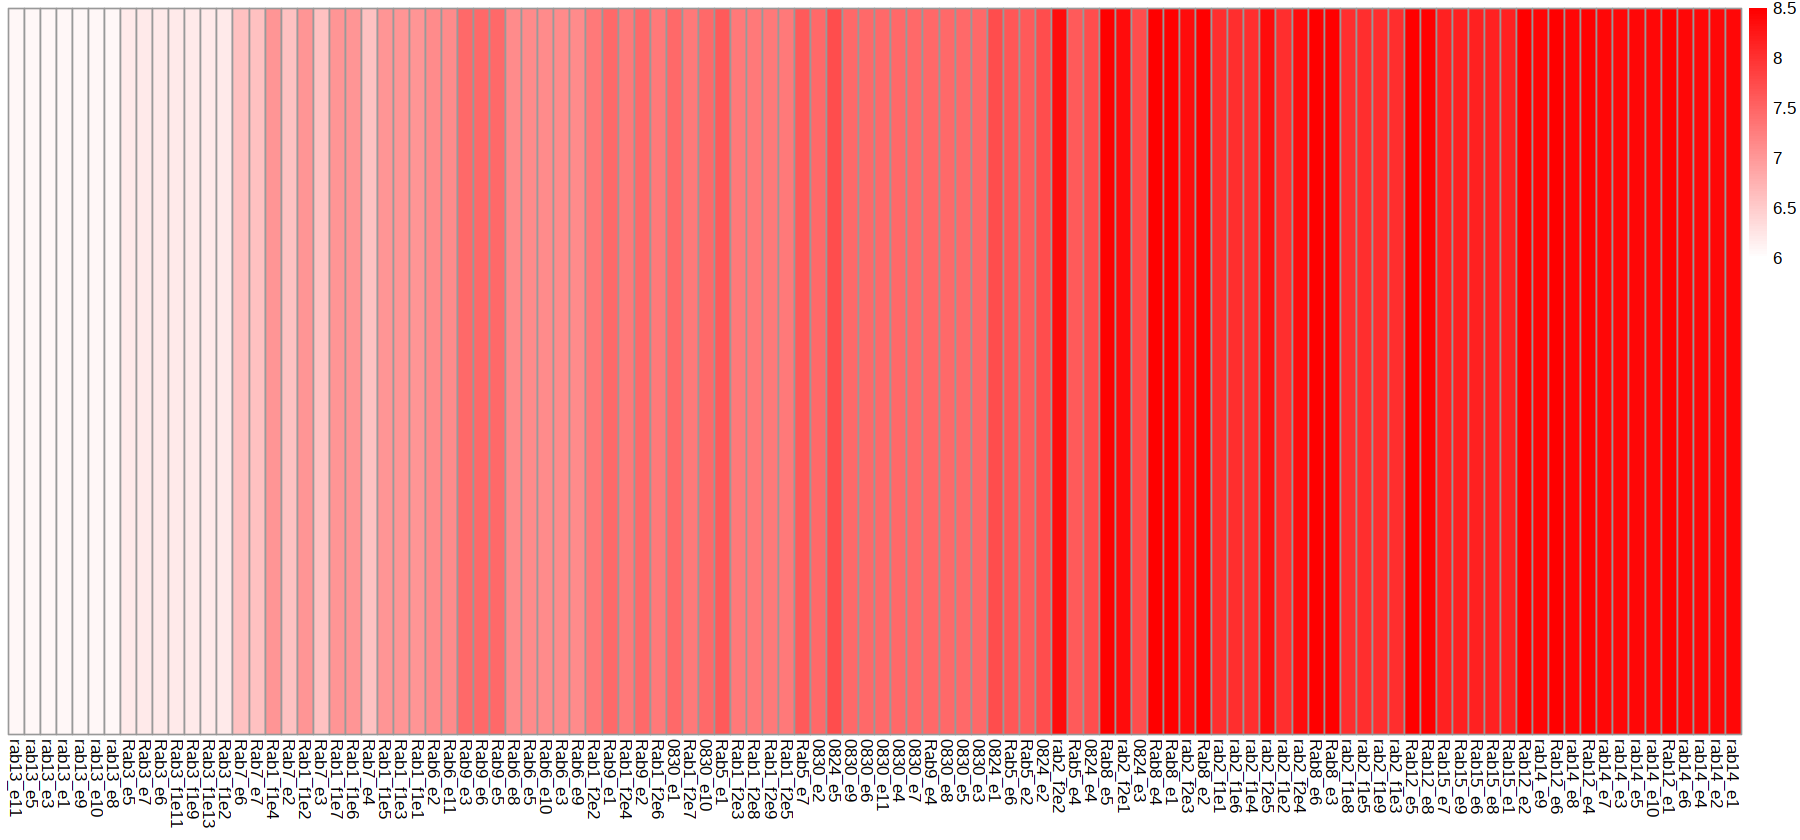

In [13]:
# pdf("emb_gd_color.pdf", width=15, height=1)
options(repr.plot.width=15, repr.plot.height=7)
paletteLength = 100
myColor <- colorRampPalette(c("white", "red"))(paletteLength)
myBreaks <- c(seq(6, 8.5, length.out=ceiling(paletteLength) + 1))
pm = pheatmap::pheatmap(t(gd[mega_order]), cluster_rows = F, cluster_cols = F, color = myColor, breaks = myBreaks)


In [14]:
save_pheatmap_pdf(pm, "emb_gd_color.pdf", width=15, height=1)

png 
  2

In [19]:
library(data.table)
emb_morph = fread('emb_morph.csv')
rownames(emb_morph) = emb_morph$embryo


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




In [20]:
emb_stage = emb_morph$`fresh stage`
names(emb_stage) = emb_morph$embryo

In [21]:
stages_table = table(emb_stage[mega_order], mega_order)

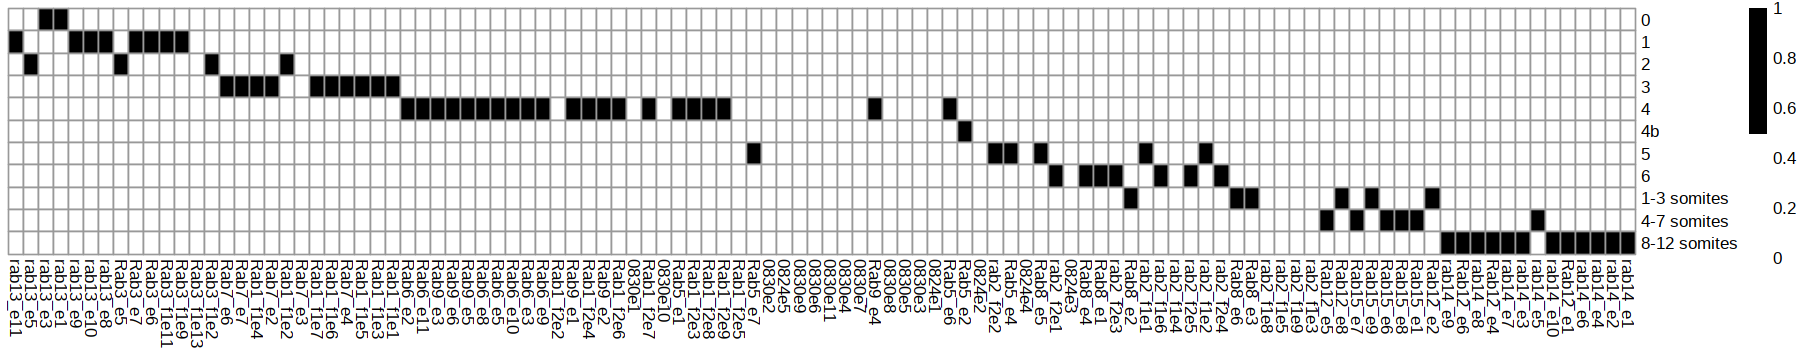

In [32]:
stages = c('0','1','2','3','4','4b','5','6','1-3 somites','4-7 somites','8-12 somites')
paletteLength = 2
# pdf("stages_table.pdf", width=15, height=3)
options(repr.plot.width=15, repr.plot.height=3)
myColor <- colorRampPalette(c("white", "black"))(paletteLength)
pm = pheatmap::pheatmap(stages_table[stages,mega_order], cluster_rows = F, cluster_cols = F, color = myColor)
# dev.off()

In [9]:
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
    stopifnot(!missing(x))
    stopifnot(!missing(filename))
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
}

In [34]:
save_pheatmap_pdf(pm, "stages_table.pdf", width=15, height=3)

png 
  2

In [29]:
stages = c('0','1','2','3','4','4b','5','6','1-3 somites','4-7 somites','8-12 somites')
paletteLength = 2
pdf("stages_table.pdf", width=25, height=12)
myColor <- colorRampPalette(c("white", "black"))(paletteLength)
pheatmap::pheatmap(stages_table[stages,mega_order], cluster_rows = F, cluster_cols = F, color = myColor)

In [30]:
dev.off()

pdf 
  3

In [108]:
# options(repr.plot.width=25, repr.plot.height=12)
pdf("freq_plot.pdf", width=25, height=12)
op <- par(mar = c(10,4,4,2) + 0.1)
# barplot(t(mc_tn), col=colnames(mc_tn), las=2)
barplot(t(mc_tn[mega_order,color_ord]), col=colnames(mc_tn[,color_ord]), las=2)

In [89]:
length(mega_order)

[1] 105

In [ ]:
rownames(mc_tn[order(-(mc_tn[,"#635547"]-mc_tn[,'#A69369']-mc_tn[,'#89AB69']-mc_tn[,'#FA5F05']-mc_tn[,'#966F1B']-mc_tn[,'#005579']-mc_tn[,'#13095C'])),color_ord])

In [17]:
groups = read.table("embs_grouping12_2206.txt", sep="\t", header = T)
head(groups)
rownames(groups) = groups$embryo
groups[groups$gt == 6,]

,embryo,chunk,gt
,<chr>,<int>,<dbl>
1,rab13_e11,1,6
2,rab13_e5,1,6
3,rab13_e3,1,6
4,rab13_e1,1,6
5,rab13_e9,1,6
6,rab13_e10,1,6


,embryo,chunk,gt
,<chr>,<int>,<dbl>
rab13_e11,rab13_e11,1,6
rab13_e5,rab13_e5,1,6
rab13_e3,rab13_e3,1,6
rab13_e1,rab13_e1,1,6
rab13_e9,rab13_e9,1,6
rab13_e10,rab13_e10,1,6
rab13_e8,rab13_e8,1,6


In [19]:
emb_groups = groups %>% group_by(gt) %>% summarise(embryos=n())

In [39]:
df

function (x, df1, df2, ncp, log = FALSE) 
{
    if (missing(ncp)) 
        .Call(C_df, x, df1, df2, log)
    else .Call(C_dnf, x, df1, df2, ncp, log)
}
<bytecode: 0x556ac2af0ff0>
<environment: namespace:stats>

In [38]:
library(plyr)
df <- ddply(emb_groups,.(gt),transform,step=cumsum(step))

plot(step~events,data=df[df$gt==1,],type="s",xlim=c(0,max(df$events)),ylim=c(0,max(df$step)),xlab="time",ylab="step")
lines(step~events,data=df[df$gt==2,],type="s",col=2)
lines(step~events,data=df[df$gt==3,],type="s",col=3)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from 'package:purrr':

    compact




ERROR: Error in eval(substitute(list(...)), `_data`, parent.frame()): cannot coerce type 'closure' to vector of type 'double'


In [45]:
groups

,embryo,chunk,gt
,<chr>,<int>,<dbl>
rab13_e11,rab13_e11,1,6.0
rab13_e5,rab13_e5,1,6.0
rab13_e3,rab13_e3,1,6.0
rab13_e1,rab13_e1,1,6.0
rab13_e9,rab13_e9,1,6.0
rab13_e10,rab13_e10,1,6.0
rab13_e8,rab13_e8,1,6.0
Rab3_e5,Rab3_e5,2,6.2
Rab3_e7,Rab3_e7,2,6.2


Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"


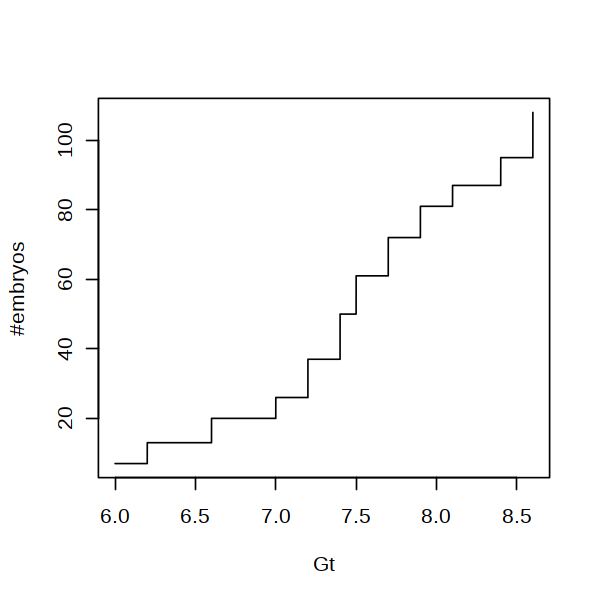

In [58]:
options(repr.plot.width=5, repr.plot.height=5)
# pdf("embs_over_time.pdf")
plot(x = seq(from = 6,to = 8.6,length.out = 10000),y = 108*ecdf(x = rep(emb_groups$gt,emb_groups$embryos))(seq(from = 6,to = 8.6,length.out = 10000)), type="line", ylab = "#embryos", xlab="Gt")
# dev.off()

In [49]:
?ecdf

In [103]:
flat_groups = data.frame(mc_t) %>% rename(embryo=Var1, color=Var2) %>% inner_join(groups, on=embryo) %>% group_by(chunk, color) %>% summarise(Freq = sum(Freq, na.rm = TRUE)) %>% spread(key = color, value = Freq) %>% remove_rownames %>% column_to_rownames(var="chunk")

Joining, by = "embryo"
`summarise()` has grouped output by 'chunk'. You can override using the
`.groups` argument.


In [104]:
mcg_t = flat_groups/rowSums(flat_groups)

In [105]:
mcg_t = mcg_t[, color_ord]

In [ ]:
t(mcg_t[8,])

In [107]:
# options(repr.plot.width=6, repr.plot.height=8)
pdf("freq_plot_grouped.pdf", width=25, height=12)
op <- par(mar = c(10,4,4,2) + 0.1)
barplot(t(mcg_t), col=colnames(mcg_t), las=2)
dev.off()
# par(op) ## reset
# barplot(ct_g, col=rownames(ct_g), las=2)
# colnames(ct_g)

png 
  2

In [ ]:
rowSums(mcg_t[,c('#FBBE92',	# Blood progenitors
'#BD190A',  # Erythroid1
'#FA5F05',  # Erythroid2
'#F7BD51',	# Hematoendothelial
'#FF9100',	# Endothelial
'#966F1B'  # Endothelial2
        )])

In [ ]:
x = c(6, 6.2, 6.6, 7, 7.2, 7.4, 7.5, 7.7, 7.9, 8.1, 8.4, 8.6)

plot(x, rowSums(mcg_t[,c('#FBBE92',	# Blood progenitors
'#BD190A',  # Erythroid1
'#FA5F05',  # Erythroid2
'#F7BD51',	# Hematoendothelial
'#FF9100',	# Endothelial
'#966F1B'  # Endothelial2
    )]), pch=19)
points(x, mcg_t[,c('#FBBE92'	# Blood progenitors
        )], col='#FBBE92', pch=19)
points(x, mcg_t[,c('#BD190A'	# Erythroid1
        )], col='#BD190A', pch=19)
points(x, mcg_t[,c(
    '#FA5F05'	# Erythroid2
        )], col='#FA5F05', pch=19)
points(x, mcg_t[,c(
    '#F7BD51'	# Hematoendothelial
        )], col='#F7BD51', pch=19)
points(x, mcg_t[,c(
    '#FF9100'	# Endothelial
        )], col='#FF9100', pch=19)
points(x, mcg_t[,c(
    '#966F1B'	# Endothelial2
        )], col='#966F1B', pch=19)
# points(x, mcg_t[,c(
#     '#1408FF'	# Notochord
#         )], col='#1408FF', pch=19)

In [ ]:
mc@colors[mc@colors %in% c('#FBBE92', '#F7BD51')]

In [ ]:
x = c(6, 6.2, 6.6, 7, 7.2, 7.4, 7.5, 7.7, 7.9, 8.1, 8.4, 8.6)
# y = log2(1e-5+rowSums(mcg_t[,c('#FBBE92',	# Blood progenitors
# '#BD190A',  # Erythroid1
# '#FA5F05',  # Erythroid2
# '#F7BD51',	# Hematoendothelial
# '#FF9100',	# Endothelial
# '#966F1B'  # Endothelial2
#     )]))
# plot(x, y, pch=19)
# points(x, log2(1e-5+mcg_t[,c('#FBBE92'	# Blood progenitors
#         )]), col='#FBBE92', pch=19)
# # points(x, mcg_t[,c('#BD190A'	# Erythroid1
# #         )], col='#BD190A', pch=19)
# # points(x, mcg_t[,c(
# #     '#FA5F05'	# Erythroid2
# #         )], col='#FA5F05', pch=19)
# points(x, log2(1e-5+mcg_t[,c(
#     '#F7BD51'	# Hematoendothelial
#         )]), col='#F7BD51', pch=19)
# points(x, mcg_t[,c(
#     '#FF9100'	# Endothelial
#         )], col='#FF9100', pch=19)
# points(x, mcg_t[,c(
#     '#966F1B'	# Endothelial2
#         )], col='#966F1B', pch=19)
plot(x, log2(1e-5+mcg_t[,c(
    '#F211A0'
        )]), col='#F211A0', pch=19)

In [ ]:
# plot(x[7:12], log2(mcg_t[,c(
#     '#1408FF'	# Notochord
#         )][7:12]), col='#1408FF', pch=19)

fit_lm = lm(formula =  log2(mcg_t[,c(
    '#F211A0'
        )][9:12]) ~ x[9:12])
fit_lm$coefficients

In [ ]:
plot(x[3:12], log2(mcg_t[,c(
    '#F211A0'	# Notochord
        )][3:12]), col='#F211A0', pch=19)

abline(a = fit_lm$coefficients[1],b = fit_lm$coefficients[2])
# fit_lm$coefficients[2]

In [ ]:
x = c(6, 6.2, 6.6, 7, 7.2, 7.4, 7.5, 7.7, 7.9, 8.1, 8.4, 8.6)

y = log2(1e-5+rowSums(mcg_t[,c('#E66CB9',	# definitive endoderm
    '#F211A0',	# Foregut
    '#ED828F'	# Hindgut
        )]))
plot(x, y, pch=19)
abline(lm(y[6:12] ~ x[6:12]), lty='dashed')

y = log2(1e-5+mcg_t[,c('#E66CB9'	# definitive endoderm
        )])
points(x, y, col='#E66CB9', pch=19)
# abline(lm(y[6:12] ~ x[6:12]), col='#E66CB9', lty='dashed')

y = log2(1e-5+mcg_t[,c('#F211A0'	# Foregut
        )])
points(x, y, col='#F211A0', pch=19)
# abline(lm(y[6:12] ~ x[6:12]), col='#F211A0', lty='dashed')

y=log2(1e-5+mcg_t[,c(
    '#ED828F'	# Hindgut
        )])
points(x, y, col='#ED828F', pch=19)

y=log2(1e-5+mcg_t[,c(
    '#1408FF'	# notochord
        )])
points(x, y, col='#1408FF', pch=19)
abline(lm(y[6:12] ~ x[6:12]), col='#1408FF', lty='dashed')
# abline(lm(y[6:12] ~ x[6:12]), col='#ED828F', lty='dashed')

In [ ]:
lm(y[6:12] ~ x[6:12])

In [ ]:
y = log2(1e-5+rowSums(mcg_t[,c('#E66CB9',	# definitive endoderm
    '#F211A0',	# Foregut
    '#ED828F'	# Hindgut
        )]))
plot(x, y, pch=19)
abline(lm(y[6:12] ~ x[6:12]))

In [ ]:
x = c(6, 6.2, 6.6, 7, 7.2, 7.4, 7.5, 7.7, 7.9, 8.1, 8.4, 8.6)

y = log2(1e-5+rowSums(mcg_t[,c('#E66CB9',	# definitive endoderm
    '#F211A0',	# Foregut
    '#ED828F'	# Hindgut
        )]))
plot(x, y, pch=19)
points(x, -1.8365*x + 10.521, pch=2)

abline(lm(y[6:12] ~ x[6:12]), lty='dashed')

In [ ]:
tmp = lm(y[6:12] ~ x[6:12])$coefficients

In [ ]:
tmp

In [ ]:
x = c(6, 6.2, 6.6, 7, 7.2, 7.4, 7.5, 7.7, 7.9, 8.1, 8.4, 8.6)

y = rowSums(mcg_t[,c('#E66CB9',	# definitive endoderm
    '#F211A0',	# Foregut
    '#ED828F'	# Hindgut
        )])
plot(x, y, pch=19)
points(x, -0.072*x + 0.6401, pch=2)
points(x, 2^(-1.8365*x + 10.521), pch=2)
abline(lm(y[6:12] ~ x[6:12]), lty='dashed')

In [ ]:
exp(-1.273)

In [ ]:
library("devtools")
library("Matrix")
library(tgutil)
library(tidyverse)

# load_all("metacell/")
library(metacell)

In [ ]:
gt = fread("embs_grouping12_2204.txt")

In [ ]:
md[md$embryo=='Rab15_e1_tail',]$embryo = "Rab15_e1"

In [ ]:
md$gt = (md %>% left_join(gt,by = 'embryo'))$gt

In [ ]:
mdt = md$gt
names(mdt) = rownames(md)
mdt = tibble::enframe(mdt)  %>% rename(t=value)
cell_mc_tab = tibble::enframe(mc@mc) %>% rename(metacell=value)
mc_md = mdt %>% left_join(cell_mc_tab , by='name') %>% group_by(metacell) %>% summarise(gt = mean(t, na.rm = T))
mc_md = mc_md[mc_md$metacell>0,]
mc_md = mc_md[!is.na(mc_md$metacell),]

In [ ]:
mc_md$endo_prof = -0.072*mc_md$gt + 0.6401

In [ ]:
mc_prof = fread('emb.metacell_proliferation_rate3.tsv')
mc_prof[mc_prof$mc %in% names(mc@colors[
    mc@colors %in% c('#E66CB9',	# definitive endoderm
    '#F211A0',	# Foregut
    '#ED828F'	# Hindgut
        )]),]

In [ ]:
endo = mc_md[mc_md$metacell %in% names(mc@colors[
    mc@colors %in% c('#E66CB9',	# definitive endoderm
    '#F211A0',	# Foregut
    '#ED828F'	# Hindgut
        )]),]

In [ ]:
print(endo[endo$gt > 7.5,]$metacell)